# Loading libraries

In [2]:
#Bread and butter
import pandas as pd
import numpy as np
from scipy import stats
import os
import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

In [187]:
# FE / ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif, f_regression, mutual_info_classif,mutual_info_regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, ElasticNet

In [5]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.3 MB/s eta 0:00:00


### Python libraries for feature encoding and fe for categorical variables

In [6]:
import category_encoders as ce

In [81]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data loading

In [7]:
 # Loading the data
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
downloaded = drive.CreateFile({'id':'1uz6Xve-9KYgovh9Z7J-0tGNa7wZwACAj'}) 
downloaded.GetContentFile('X_discrete.csv')
data = pd.read_csv('X_discrete.csv')
data.head()

Unnamed: 0  type_of_ventilation(0:n-1:noninvasive-2:invasive)  \
0           0                                                2.0   
1           1                                                2.0   
2           2                                                2.0   
3           3                                                2.0   
4           4                                                2.0   

   renal_replacement(0:n-1:y)  Pneumo(0:n-1:y)  \
0                         0.0              1.0   
1                         0.0              1.0   
2                         0.0              1.0   
3                         0.0              1.0   
4                         0.0              1.0   

   Trach_secration(0:little-1:abundant-2:ab_with_prulent)  \
0                                                2.0        
1                                                2.0        
2                                                2.0        
3                                                1.0        
4                                                1.0        

   Infiltrate(0:n-1:diffuse-2:localized)  ARDS(0:n-1:y)  \
0                                    2.0            0.0   
1                                    2.0            0.0   
2                                    2.0            0.0   
3                                    2.0            0.0   
4                                    2.0            0.0   

   eye_response(4:spontaneous-3:after_prompt-2:on_pain_sti-1:no)  \
0                                                4.0               
1                                                4.0               
2                                                4.0               
3                                                4.0               
4                                                4.0               

   Verbal(5:clear-4:confused-3:single_words-2:single_sounds-1:no)  \
0                                                5.0                
1                                                5.0                
2                                                5.0                
3                                                5.0                
4                                                5.0                

   Motor(6=>1_getting_worse)  ...  target_conc(mg/L)  \
0                        6.0  ...               80.0   
1                        6.0  ...               80.0   
2                        6.0  ...               80.0   
3                        6.0  ...               80.0   
4                        6.0  ...               20.0   

   target_based_on(0:no_patogen-1:patogen)  change_in_pip(0:n-1:y)  \
0                                      0.0                     0.0   
1                                      1.0                     0.0   
2                                      0.0                     1.0   
3                                      0.0                     0.0   
4                                      1.0                     1.0   

   CHECK1_B(0:n-1:y)  CHECK2_B  CHECK3_B  CHECK4_B  Sex  \
0                0.0       0.0       0.0       0.0    1   
1                0.0       0.0       0.0       0.0    1   
2                0.0       0.0       0.0       0.0    1   
3                0.0       0.0       0.0       0.0    1   
4                0.0       0.0       0.0       0.0    1   

   Randomization group (1_TDM 2_Control)  dead  
0                                    1.0     0  
1                                    1.0     0  
2                                    1.0     0  
3                                    1.0     0  
4                                    1.0     0  

[5 rows x 57 columns]

In [9]:
data = data.drop(['Unnamed: 0','dead','Randomization group (1_TDM 2_Control)'],axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 54 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   type_of_ventilation(0:n-1:noninvasive-2:invasive)               2386 non-null   float64
 1   renal_replacement(0:n-1:y)                                      2386 non-null   float64
 2   Pneumo(0:n-1:y)                                                 2386 non-null   float64
 3   Trach_secration(0:little-1:abundant-2:ab_with_prulent)          2386 non-null   float64
 4   Infiltrate(0:n-1:diffuse-2:localized)                           2386 non-null   float64
 5   ARDS(0:n-1:y)                                                   2386 non-null   float64
 6   eye_response(4:spontaneous-3:after_prompt-2:on_pain_sti-1:no)   2386 non-null   float64
 7   Verbal(5:clear-4:confused-3:single_words-2:single_s

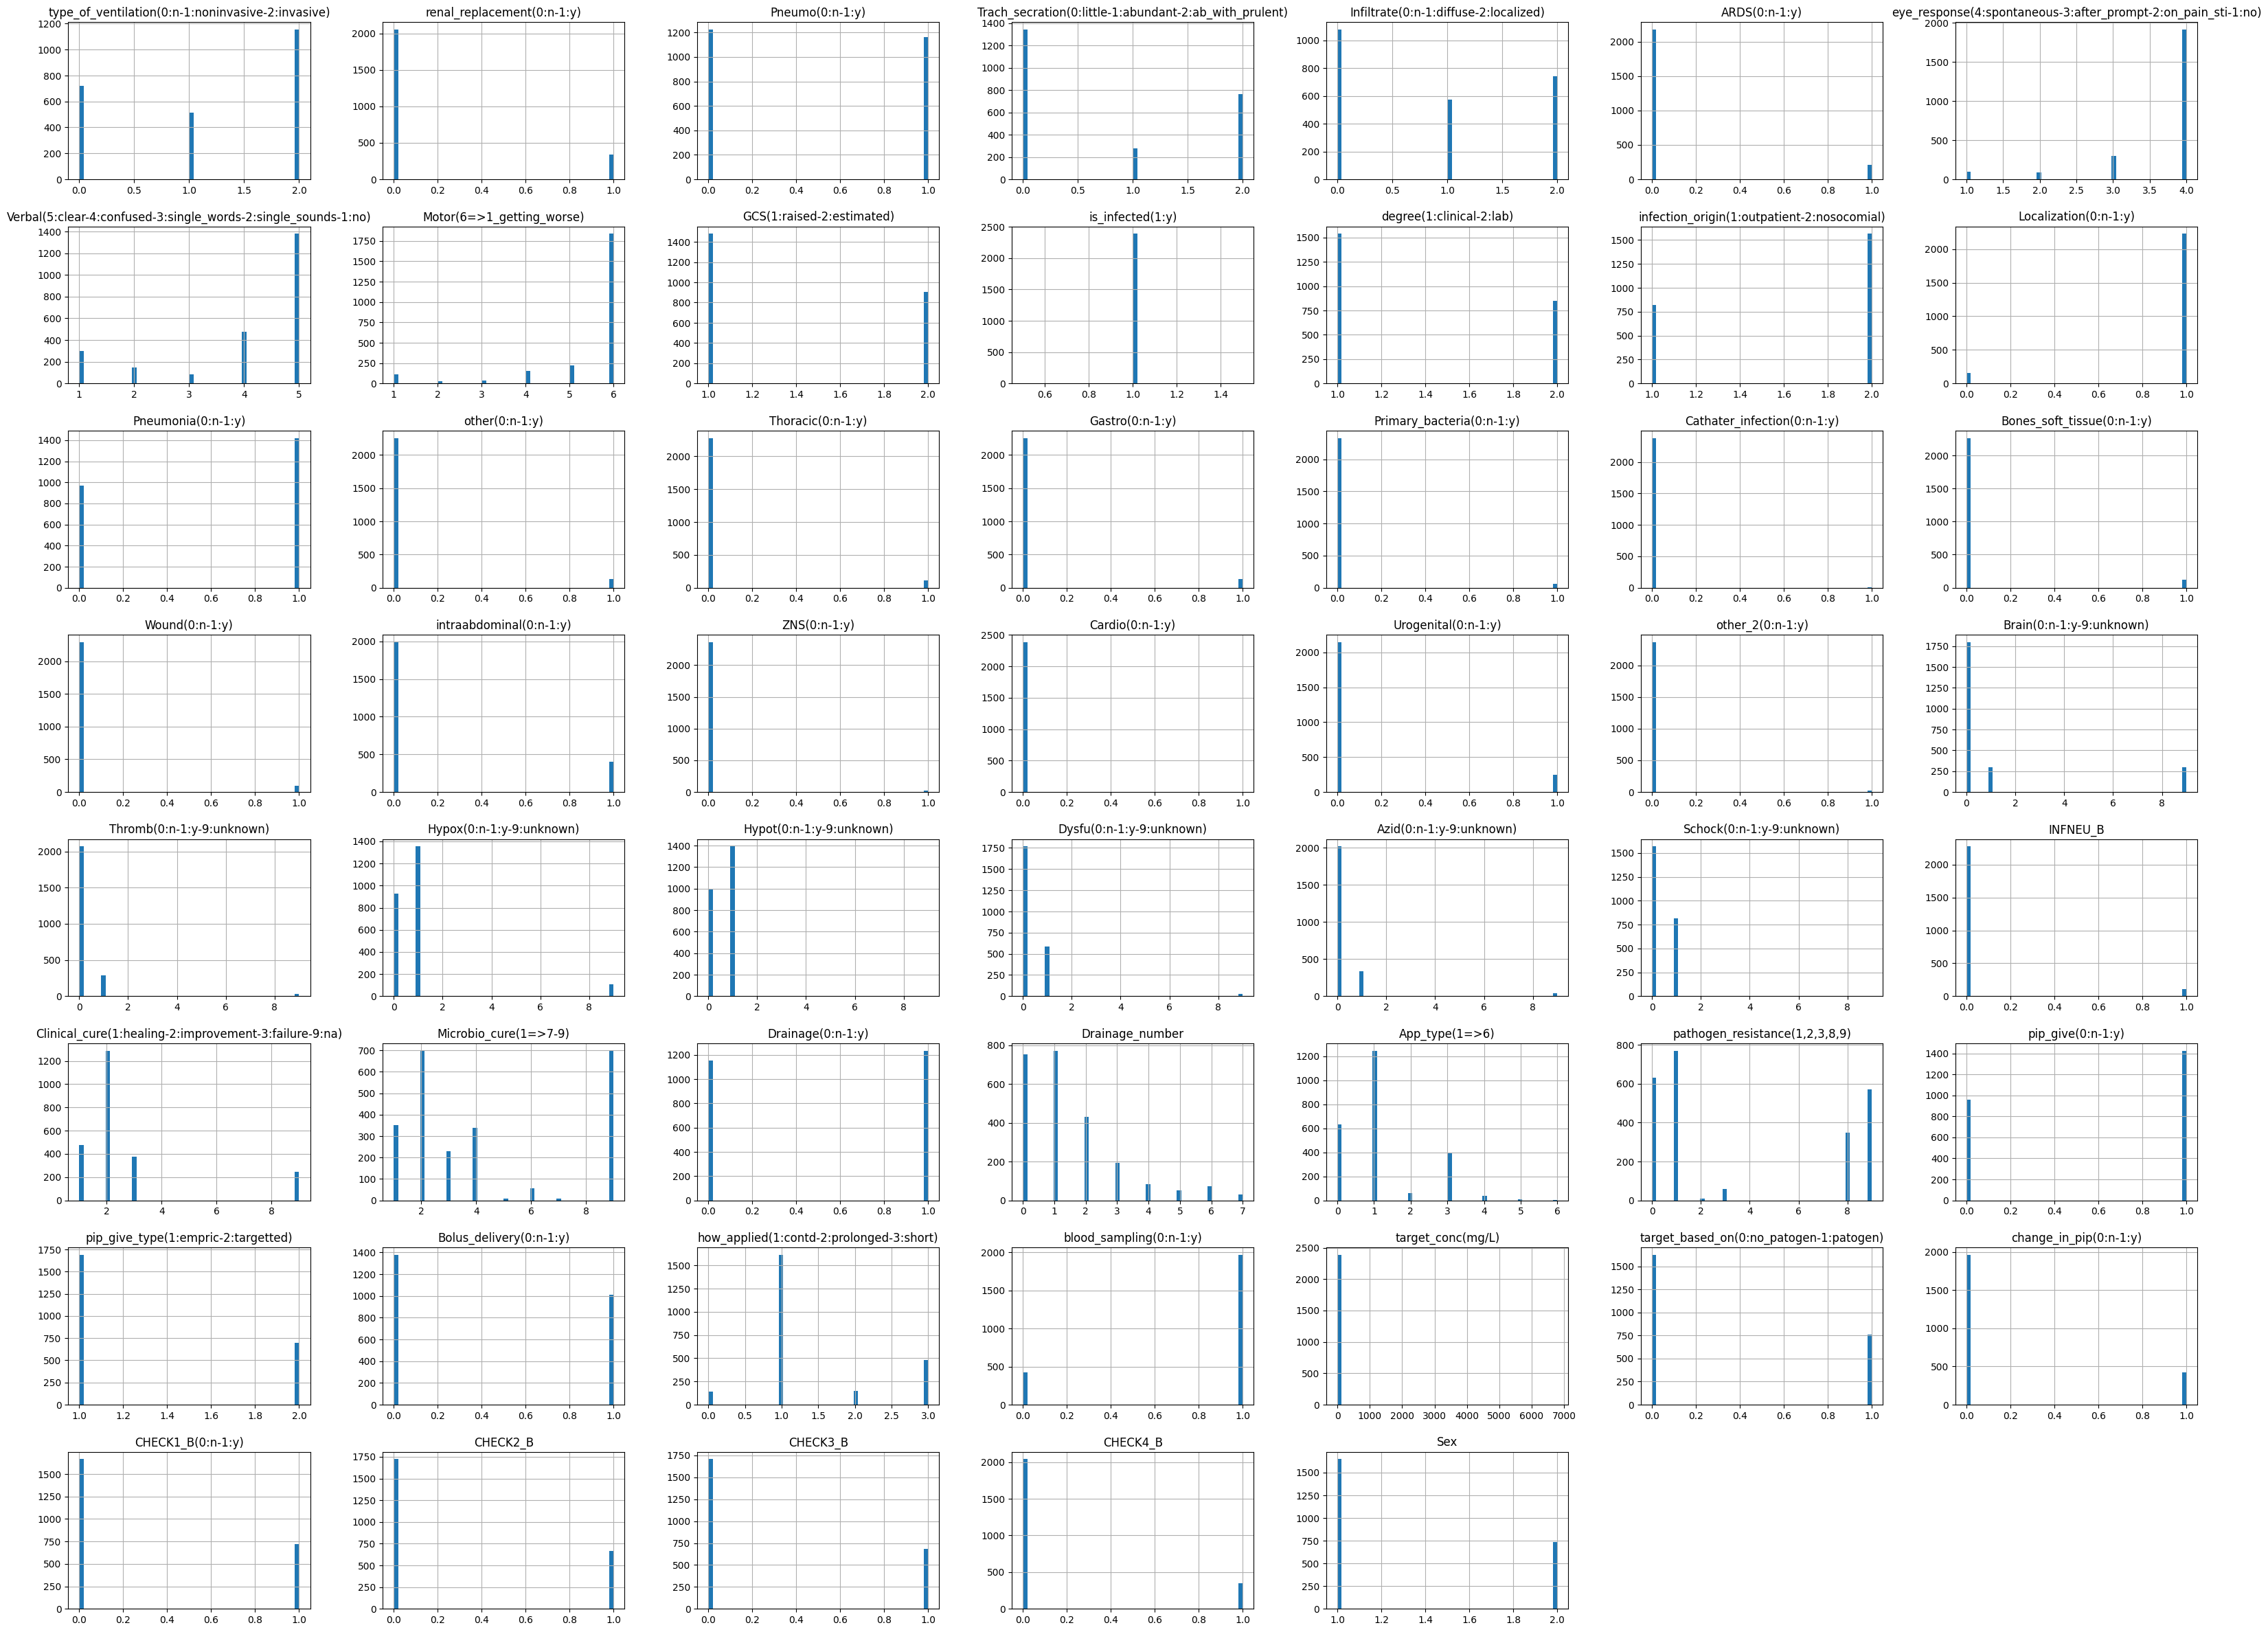

In [11]:
data.hist(bins=50, figsize=(40,30))
plt.show()

In [12]:
 data.describe()

type_of_ventilation(0:n-1:noninvasive-2:invasive)  \
count                                        2386.000000   
mean                                            1.182313   
std                                             0.867221   
min                                             0.000000   
25%                                             0.000000   
50%                                             1.000000   
75%                                             2.000000   
max                                             2.000000   

       renal_replacement(0:n-1:y)  Pneumo(0:n-1:y)  \
count                 2386.000000      2386.000000   
mean                     0.140402         0.487427   
std                      0.347477         0.499947   
min                      0.000000         0.000000   
25%                      0.000000         0.000000   
50%                      0.000000         0.000000   
75%                      0.000000         1.000000   
max                      1.000000         1.000000   

       Trach_secration(0:little-1:abundant-2:ab_with_prulent)  \
count                                        2386.000000        
mean                                            0.758592        
std                                             0.909062        
min                                             0.000000        
25%                                             0.000000        
50%                                             0.000000        
75%                                             2.000000        
max                                             2.000000        

       Infiltrate(0:n-1:diffuse-2:localized)  ARDS(0:n-1:y)  \
count                            2386.000000    2386.000000   
mean                                0.858759       0.088013   
std                                 0.860842       0.283374   
min                                 0.000000       0.000000   
25%                                 0.000000       0.000000   
50%                                 1.000000       0.000000   
75%                                 2.000000       0.000000   
max                                 2.000000       1.000000   

       eye_response(4:spontaneous-3:after_prompt-2:on_pain_sti-1:no)  \
count                                        2386.000000               
mean                                            3.685666               
std                                             0.725183               
min                                             1.000000               
25%                                             4.000000               
50%                                             4.000000               
75%                                             4.000000               
max                                             4.000000               

       Verbal(5:clear-4:confused-3:single_words-2:single_sounds-1:no)  \
count                                        2386.000000                
mean                                            4.039396                
std                                             1.413368                
min                                             1.000000                
25%                                             4.000000                
50%                                             5.000000                
75%                                             5.000000                
max                                             5.000000                

       Motor(6=>1_getting_worse)  GCS(1:raised-2:estimated)  ...  \
count                2386.000000                2386.000000  ...   
mean                    5.452221                   1.380134  ...   
std                     1.244030                   0.485521  ...   
min                     1.000000                   1.000000  ...   
25%                     6.000000                   1.000000  ...   
50%                     6.000000                   1.000000  ...   
75%                     6.000000          

In [13]:
data.nunique()

type_of_ventilation(0:n-1:noninvasive-2:invasive)                  3
renal_replacement(0:n-1:y)                                         2
Pneumo(0:n-1:y)                                                    2
Trach_secration(0:little-1:abundant-2:ab_with_prulent)             3
Infiltrate(0:n-1:diffuse-2:localized)                              3
ARDS(0:n-1:y)                                                      2
eye_response(4:spontaneous-3:after_prompt-2:on_pain_sti-1:no)      4
Verbal(5:clear-4:confused-3:single_words-2:single_sounds-1:no)     5
Motor(6=>1_getting_worse)                                          6
GCS(1:raised-2:estimated)                                          2
is_infected(1:y)                                                   1
degree(1:clinical-2:lab)                                           2
infection_origin(1:outpatient-2:nosocomial)                        2
Localization(0:n-1:y)                                              2
Pneumonia(0:n-1:y)                

## Loading scores

In [14]:
downloaded_2 = drive.CreateFile({'id':'1VN74lHinrprA_sdZPFF1PhNnBp430hq5'}) 
downloaded_2.GetContentFile('sofa.csv')
data_sofa = pd.read_csv('sofa.csv')
data_sofa.head()

Unnamed: 0  Sofa
0           0   6.0
1           1   7.0
2           2   6.0
3           3   6.0
4           4   7.0

In [15]:
data_sofa = data_sofa.drop(['Unnamed: 0'],axis=1)

In [16]:
data_sofa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sofa    2386 non-null   float64
dtypes: float64(1)
memory usage: 18.8 KB


In [17]:
data_sofa.describe()

Sofa
count  2386.000000
mean      7.387678
std       3.782582
min       0.000000
25%       5.000000
50%       7.000000
75%      10.000000
max      23.000000

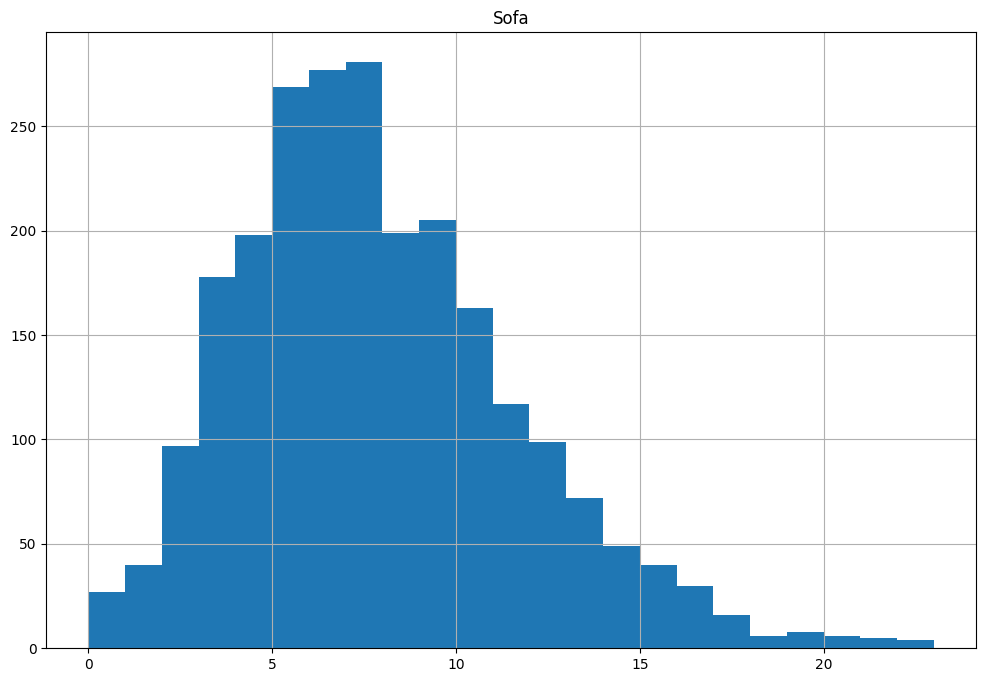

In [18]:
data_sofa.hist(bins=23, figsize=(12,8))
plt.show()

In [19]:
X_base = data
y_base = data_sofa['Sofa']
print(X_base.shape)

(2386, 54)


# Data Cleaning

## Single value features

In [20]:
# Number of unique values for each column
counts = X_base.nunique()
# record columns to delete
to_delete = [i for i,v in enumerate(counts) if v == 1]
print(to_delete)

[10]


In [21]:
X_base.columns[10]

'is_infected(1:y)'

In [22]:
# drop useless columns
X_base.drop('is_infected(1:y)', axis=1, inplace=True)
print(X_base.shape)

(2386, 53)


# Data Split to prevent leakage

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_base, y_base, test_size=0.2, stratify=y_base, random_state=12)

# Categorical data encoding

## Converting into numerical variables

In [125]:
# Our database is already numerical. here we will create a reverse conversion to play around:
mapped_df = pd.DataFrame()  # Create an empty DataFrame
mapped_df['eye_response'] = data['eye_response(4:spontaneous-3:after_prompt-2:on_pain_sti-1:no)'].map({
    4: 'spontaneous',
    3: 'after_prompt',
    2: 'on_pain',
    1: 'no'
})
mapped_df.head()

eye_response
0  spontaneous
1  spontaneous
2  spontaneous
3  spontaneous
4  spontaneous

In [33]:
unique_count = mapped_df['eye_response'].nunique()
print("Number of unique strings:", unique_count)
unique_strings = mapped_df['eye_response'].unique()
print("Unique strings:", unique_strings)

Number of unique strings: 4
Unique strings: ['spontaneous' 'after_prompt' 'on_pain' 'no']


### One hot encoding

In [35]:
# Categorical boolean mask:
# filtering categorical columns using mask and turn it into a list:
categorical_feature_mask = mapped_df.dtypes==object
categorical_cols = mapped_df.columns[categorical_feature_mask].tolist()
categorical_cols

['eye_response']

In [46]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# drop :: specifies a methodology to use to drop one of the categories per feature. 
# This is useful in situations where perfectly collinear features cause problems, such as when feeding 
# the resulting data into an unregularized linear regression model.
ohe = OneHotEncoder(sparse=False, drop=None) 

In [49]:
# Fit and transform the column to encode
encoded_column = ohe.fit_transform(mapped_df)
# Create a new DataFrame with the encoded column
encoded_df = pd.DataFrame(encoded_column, columns=ohe.get_feature_names_out(['eye_response']))
encoded_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


eye_response_after_prompt  eye_response_no  eye_response_on_pain  \
0                        0.0              0.0                   0.0   
1                        0.0              0.0                   0.0   
2                        0.0              0.0                   0.0   
3                        0.0              0.0                   0.0   
4                        0.0              0.0                   0.0   

   eye_response_spontaneous  
0                       1.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       1.0

In [50]:
# Alternative:: dropping one column
ohe = OneHotEncoder(sparse=False, drop='first') 

In [51]:
# Fit and transform the column to encode
encoded_column = ohe.fit_transform(mapped_df)
# Create a new DataFrame with the encoded column
encoded_df = pd.DataFrame(encoded_column, columns=ohe.get_feature_names_out(['eye_response']))
encoded_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


eye_response_no  eye_response_on_pain  eye_response_spontaneous
0              0.0                   0.0                       1.0
1              0.0                   0.0                       1.0
2              0.0                   0.0                       1.0
3              0.0                   0.0                       1.0
4              0.0                   0.0                       1.0

### Alternative: pandas get_dummies

In [60]:
# Get dummies
encoded_df = pd.get_dummies(mapped_df, prefix_sep='_', drop_first=True)
encoded_df.head()

eye_response_no  eye_response_on_pain  eye_response_spontaneous
0                0                     0                         1
1                0                     0                         1
2                0                     0                         1
3                0                     0                         1
4                0                     0                         1

### Label encoder

In [53]:
from sklearn.preprocessing import LabelEncoder

In [58]:
# Assuming your DataFrame is named 'df' and the column to encode is 'column_name'
column_to_encode = mapped_df['eye_response']  # Extract the column to encode

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit and transform the column to encode
encoded_column = encoder.fit_transform(column_to_encode)

# Create a new DataFrame with the encoded column
encoded_df = pd.DataFrame(encoded_column, columns=['eye_response'])

# Concatenate the encoded DataFrame with the original DataFrame: if you want to update
#df_encoded = pd.concat([mapped_df.drop('eye_response', axis=1), encoded_df], axis=1)

# Seeing together:
df_encoded = pd.concat([mapped_df, encoded_df], axis=1)
df_encoded.sample(5)

eye_response  eye_response
2003   spontaneous             3
773   after_prompt             0
2049  after_prompt             0
2256   spontaneous             3
1782   spontaneous             3

In this case, using LabelEncoder is not a good choice, as it brings in a superficial ordering for different states for which we do not have a control over.

### Rare label encoding

array([[<Axes: title={'center': 'App_type(1=>6)'}>]], dtype=object)

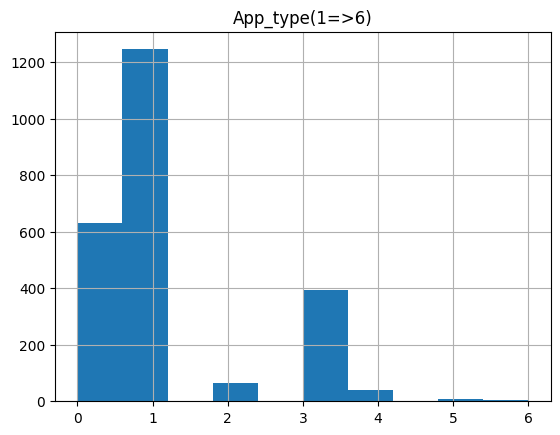

In [88]:
# Assuming your DataFrame is named 'df' and the column to encode is 'column_name'
column_to_encode = data[['App_type(1=>6)']]  # Create a DataFrame with the column to encode
column_to_encode.hist()

In [95]:
# Preparing: converting data into strings to create a case:
column_to_encode.loc[:, 'App_type(1=>6)']=column_to_encode['App_type(1=>6)'].astype(str)

# Find rare categories (e.g., categories that appear less than a certain threshold)
threshold = 100  # Define the threshold for rarity
rare_categories = column_to_encode['App_type(1=>6)'].value_counts()[column_to_encode['App_type(1=>6)'].value_counts() < threshold].index.tolist()

# Replace rare categories with a special value (e.g., 'rare')
column_to_encode.loc[column_to_encode['App_type(1=>6)'].isin(rare_categories), 'App_type(1=>6)'] = 'rare'

# Use LabelEncoder to encode the modified column
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(column_to_encode['App_type(1=>6)'])

# Use OneHotEncoder to create one-hot encoded columns
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_columns = one_hot_encoder.fit_transform(encoded_labels.reshape(-1, 1))

# Create a DataFrame with the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=[f'encoded_{i}' for i in range(encoded_columns.shape[1])])

encoded_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


encoded_0  encoded_1  encoded_2  encoded_3
0        0.0        1.0        0.0        0.0
1        0.0        1.0        0.0        0.0
2        0.0        1.0        0.0        0.0
3        0.0        1.0        0.0        0.0
4        0.0        1.0        0.0        0.0

#### Alternative: Feature engine

array([[<Axes: title={'center': 'App_type(1=>6)'}>]], dtype=object)

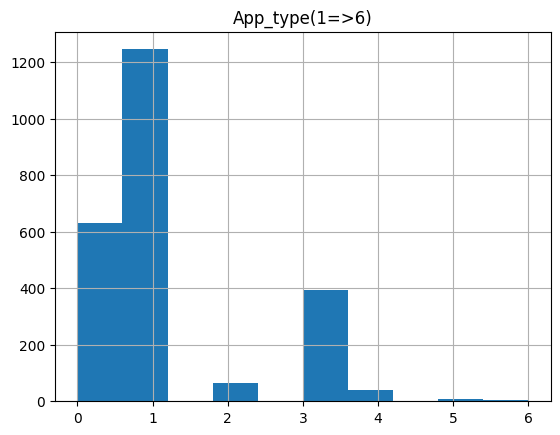

In [96]:
# Assuming your DataFrame is named 'df' and the column to encode is 'column_name'
column_to_encode = data[['App_type(1=>6)']]  # Create a DataFrame with the column to encode
column_to_encode.hist()

In [98]:
# Preparing: converting data into strings to create a case:
column_to_encode.loc[:, 'App_type(1=>6)']=column_to_encode['App_type(1=>6)'].astype(str)

In [101]:
column_to_encode.nunique()

App_type(1=>6)    7
dtype: int64

In [102]:
from feature_engine.encoding import RareLabelEncoder
#Creating the object
rle = RareLabelEncoder(tol=0.05, n_categories=3, max_n_categories=None, replace_with='Rare', )
#Fitting & transforming:
encoded_df = rle.fit_transform(column_to_encode)

In [103]:
encoded_df.nunique()

App_type(1=>6)    4
dtype: int64

### Ordinal encoding

In [104]:
# Our database is already numerical. here we will create a reverse conversion to play around:
mapped_df = pd.DataFrame()  # Create an empty DataFrame
mapped_df['eye_response'] = data['eye_response(4:spontaneous-3:after_prompt-2:on_pain_sti-1:no)'].map({
    4: 'spontaneous',
    3: 'after_prompt',
    2: 'on_pain',
    1: 'no'
})
mapped_df.head()

eye_response
0  spontaneous
1  spontaneous
2  spontaneous
3  spontaneous
4  spontaneous

In [105]:
unique_count = mapped_df['eye_response'].nunique()
print("Number of unique strings:", unique_count)
unique_strings = mapped_df['eye_response'].unique()
print("Unique strings:", unique_strings)

Number of unique strings: 4
Unique strings: ['spontaneous' 'after_prompt' 'on_pain' 'no']


In [108]:
data_sofa.head()

Sofa
0   6.0
1   7.0
2   6.0
3   6.0
4   7.0

In [110]:
from feature_engine.encoding import OrdinalEncoder

In [111]:
ordinal_encoder = OrdinalEncoder(encoding_method='ordered',) 

In [120]:
encoded_df = ordinal_encoder.fit_transform(mapped_df,data_sofa)
encoded_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


eye_response
0             0
1             0
2             0
3             0
4             0

In [113]:
ordinal_encoder.encoder_dict_

{'eye_response': {'spontaneous': 0, 'after_prompt': 1, 'on_pain': 2, 'no': 3}}

### Count/ Frequency Encoding

In [114]:
from feature_engine.encoding import CountFrequencyEncoder
'''
-------------------------------------------------------------------------------------------------------------------------------------
CountFrequencyEncoder(encoding_method='count', variables=None, missing_values='raise', ignore_format=False, unseen='ignore')
-------------------------------------------------------------------------------------------------------------------------------------
The CountFrequencyEncoder() replaces categories by either the count or the percentage of observations per category. 
For example in the variable colour, if 10 observations are blue, blue will be replaced by 10. 
Alternatively, if 10% of the observations are blue, blue will be replaced by 0.1.
------------------------------------------------------------------------------------------
With ignore_format=True you have the option to encode numerical variables as well. 
------------------------------------------------------------------------------------------
encoding_method: str, default=’count’

    Desired method of encoding.

    ‘count’: number of observations per category

    ‘frequency’: percentage of observations per category
'''

In [115]:
freq_encoder = CountFrequencyEncoder(encoding_method='frequency',)

In [116]:
encoded_df = freq_encoder.fit_transform(mapped_df)
encoded_df.head()

eye_response
0      0.800922
1      0.800922
2      0.800922
3      0.800922
4      0.800922

In [117]:
freq_encoder = CountFrequencyEncoder(encoding_method='count',)

In [118]:
encoded_df = freq_encoder.fit_transform(mapped_df)
encoded_df.head()

eye_response
0          1911
1          1911
2          1911
3          1911
4          1911

### Mean encoder

Here the idea is simple: we replace labels of the categorical feature by the mean value of the target for that label.

In [121]:
from feature_engine.encoding import MeanEncoder
mean_encoder = MeanEncoder()

In [122]:
encoded_df = mean_encoder.fit_transform(mapped_df,data_sofa)
encoded_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


eye_response
0      6.873365
1      6.873365
2      6.873365
3      6.873365
4      6.873365

### Weight of Evidence (WoE) Encoding


In [ ]:
# Our database is already numerical. here we will create a reverse conversion to play around:
mapped_df = pd.DataFrame()  # Create an empty DataFrame
mapped_df['eye_response'] = data['eye_response(4:spontaneous-3:after_prompt-2:on_pain_sti-1:no)'].map({
    4: 'spontaneous',
    3: 'after_prompt',
    2: 'on_pain',
    1: 'no'
})
mapped_df.head()

In [144]:
mapped_df.nunique()

eye_response    4
dtype: int64

In [147]:
threshold = 6
binary_sofa = data_sofa.applymap(lambda x: 0 if x >= threshold else 1)

In [148]:
from feature_engine.encoding import WoEEncoder
woe_encoder = WoEEncoder()

In [149]:
encoded_df = woe_encoder.fit_transform(mapped_df,binary_sofa)
encoded_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


eye_response
0      0.181973
1      0.181973
2      0.181973
3      0.181973
4      0.181973

### Decision tree encoder

The DecisionTreeEncoder() replaces categories in the variable with the predictions of a decision tree.

The transformer first encodes categorical variables into numerical variables using OrdinalEncoder(). 

Then, the transformer fits with this numerical variable a decision tree to predict the target variable. 

Finally, the original categorical variable is replaced by the predictions of the decision tree.

In [150]:
from feature_engine.encoding import DecisionTreeEncoder
tree_encoder = DecisionTreeEncoder(
    regression=True,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=2023,)

In [151]:
encoded_df = tree_encoder.fit_transform(mapped_df,data_sofa)
encoded_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


eye_response
0      6.873365
1      6.873365
2      6.873365
3      6.873365
4      6.873365

In [156]:
encoded_df['eye_response'].unique()

array([ 6.87336473,  8.49491525,  9.74117647, 12.18947368])

## Alternative approach: Multiple Correspondence Analysis (MCA)

Multiple Correspondence Analysis (MCA) is a dimensionality reduction technique that is specifically designed for categorical or discrete data. It extends the concept of Correspondence Analysis (CA) to handle multiple categorical variables simultaneously. MCA is useful for exploring relationships and patterns within categorical variables and visualizing the underlying structure of the data.

In [162]:
!pip install prince  # Install the Prince library if not already installed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [163]:
from prince import MCA

In [175]:
# Create an instance of MCA and fit it to the DataFrame
mca = MCA(
    n_components=40,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca.fit(X_train)

# Transform the DataFrame using the fitted MCA model
new_feature_set = mca.transform(X_train)

In [176]:
# Eigenvalues
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.088        14.60%                     14.60%
1              0.063        10.42%                     25.02%
2              0.049         8.01%                     33.03%
3              0.039         6.39%                     39.42%
4              0.032         5.27%                     44.69%
5              0.027         4.52%                     49.21%
6              0.024         3.93%                     53.14%
7              0.022         3.57%                     56.71%
8              0.019         3.12%                     59.83%
9              0.018         2.94%                     62.77%
10             0.017         2.87%                     65.64%
11             0.015         2.40%                     68.04%
12             0.013         2.16%                     70.20%
13             0.013         2.14%                     72.34%
14             0.011         1.87%                     74.21%
15             0.010         1.62%                     75.83%
16             0.009         1.56%                     77.39%
17             0.009         1.54%                     78.94%
18             0.009         1.43%                     80.36%
19             0.008         1.39%                     81.76%
20             0.008         1.31%                     83.06%
21             0.008         1.28%                     84.34%
22             0.007         1.23%                     85.57%
23             0.007         1.18%                     86.75%
24             0.007         1.11%                     87.86%
25             0.006         1.07%                     88.93%
26             0.006         1.05%                     89.98%
27             0.006         0.96%                     90.93%
28             0.005         0.90%                     91.83%
29             0.005         0.84%                     92.68%
30             0.005         0.79%                     93.47%
31             0.005         0.77%                     94.24%
32             0.004         0.69%                     94.93%
33             0.004         0.63%                     95.56%
34             0.003         0.54%                     96.10%
35             0.003         0.52%                     96.63%
36             0.003         0.50%                     97.13%
37             0.003         0.46%                     97.59%
38             0.002         0.38%                     97.97%
39             0.002         0.35%                     98.32%

In [179]:
new_feature_set.head(3)

0         1         2         3         4         5         6   \
1064 -0.262991  0.375490  0.048385 -0.140915  0.035080  0.080773  0.100313   
866   0.128520 -0.088482  0.233522 -0.170025  0.052052 -0.074268 -0.028063   
554  -0.028586 -0.102064 -0.029028 -0.182887  0.004372  0.185423  0.031485   

            7         8         9   ...        30        31        32  \
1064  0.177621  0.088007 -0.096817  ... -0.015655  0.032369 -0.039449   
866   0.063040 -0.183223  0.036801  ...  0.017677 -0.013290 -0.019632   
554  -0.025797  0.181181 -0.019809  ...  0.077493 -0.001295  0.020127   

            33        34        35        36        37        38        39  
1064  0.013020  0.089596 -0.049495  0.008823 -0.019433  0.031785  0.000215  
866   0.004403 -0.006790 -0.025275 -0.054839  0.001986 -0.020691  0.002045  
554  -0.018900 -0.013375 -0.033469 -0.029824 -0.081122  0.029792  0.053818  

[3 rows x 40 columns]

In [181]:
mca.plot(X_train)

alt.Chart(...)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>,
        <Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>],
       [<Axes: title={'center': '18'}>, <Axes: title={'center': '19'}>,
        <Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>],
       [<Axes: title={'center': '24'}>, <Axes: title={'center': '25'}>,
        <Axes: title={'center': '26'}>, <Axes: title={'center': '27'}>

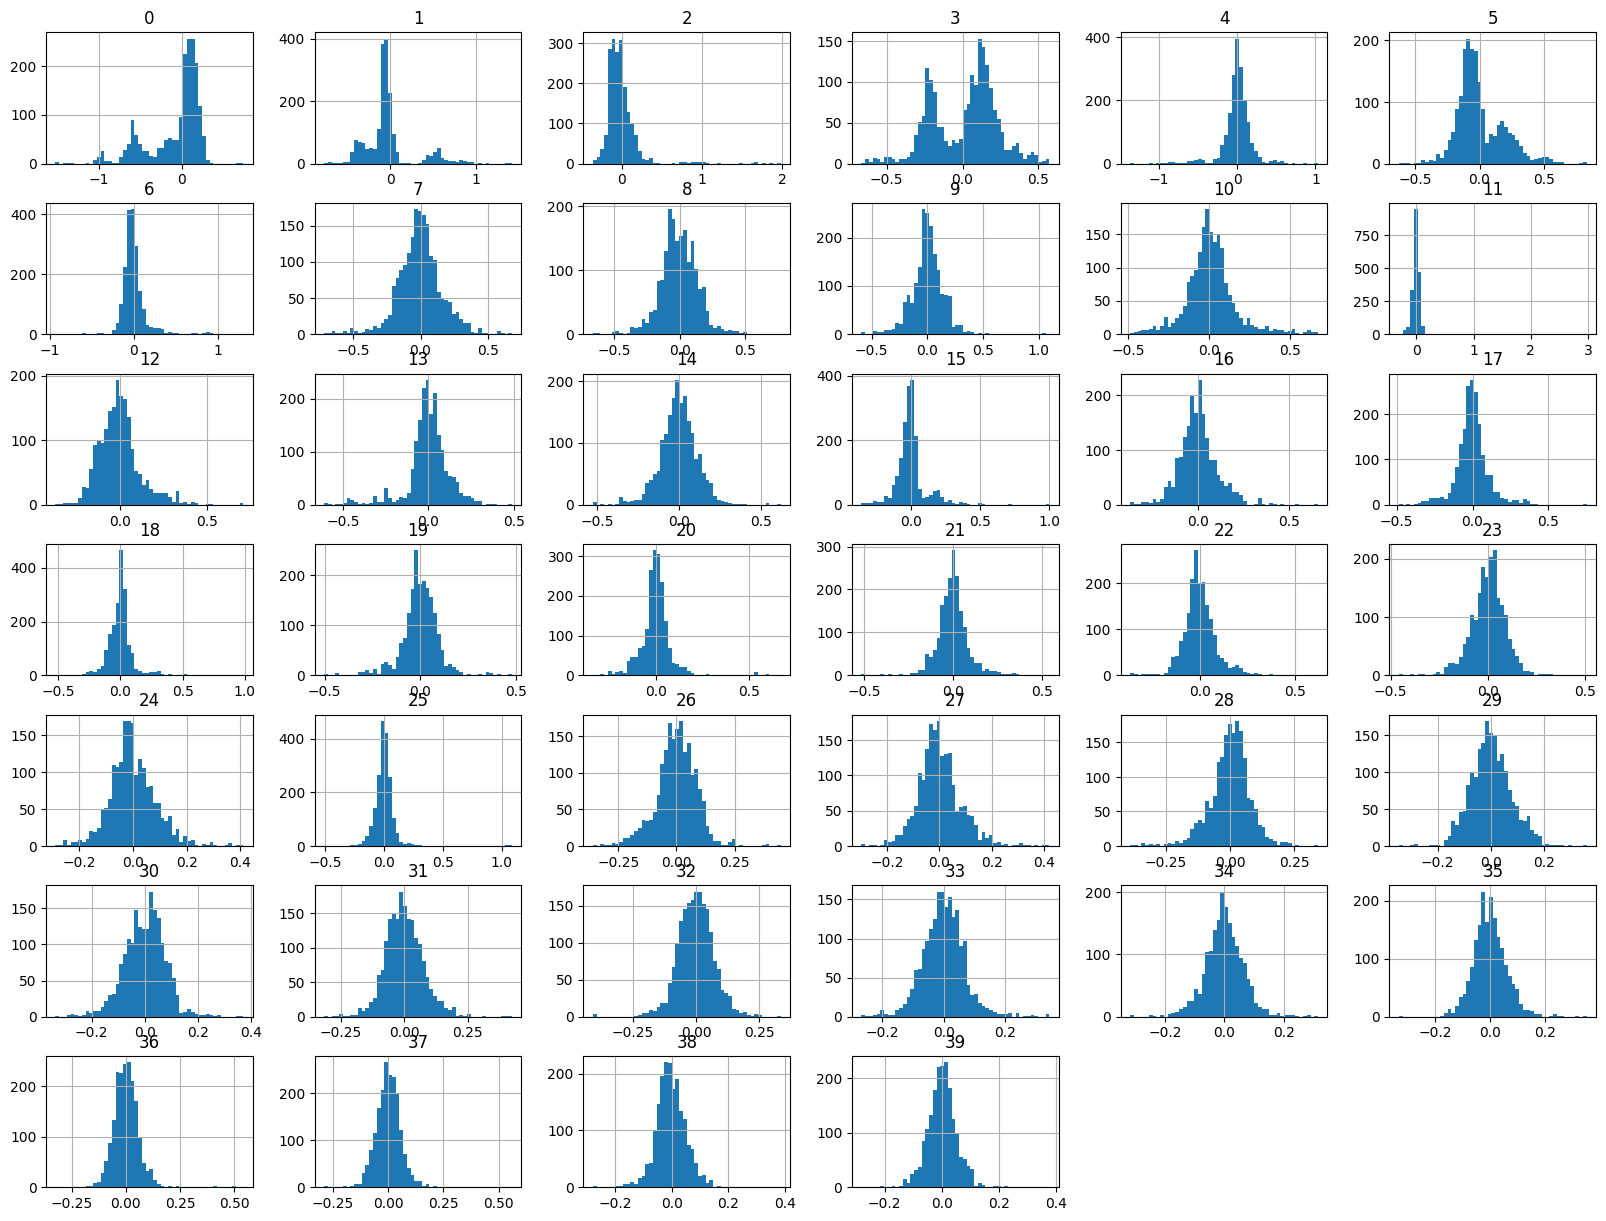

In [183]:
new_feature_set.hist(bins=50, figsize = (20,15))

## CatBoost Encoder

In [184]:
# CatBooster Encoder
# https://contrib.scikit-learn.org/category_encoders/catboost.html
catBooster = ce.cat_boost.CatBoostEncoder()
X_train_catboost = catBooster.fit_transform(X_train.astype(str), y_train)
X_train_catboost.head()

type_of_ventilation(0:n-1:noninvasive-2:invasive)  \
1064                                           7.386792   
866                                            7.386792   
554                                           11.693396   
89                                            11.795597   
2051                                           7.693396   

      renal_replacement(0:n-1:y)  Pneumo(0:n-1:y)  \
1064                    7.386792         7.386792   
866                     7.386792         7.386792   
554                    11.693396        11.693396   
89                      7.693396         7.693396   
2051                    8.462264         8.462264   

      Trach_secration(0:little-1:abundant-2:ab_with_prulent)  \
1064                                           7.386792        
866                                           11.693396        
554                                            7.386792        
89                                             9.693396        
2051                                          10.462264        

      Infiltrate(0:n-1:diffuse-2:localized)  ARDS(0:n-1:y)  \
1064                               7.386792       7.386792   
866                                7.386792      11.693396   
554                               11.693396      10.462264   
89                                 7.693396      10.846698   
2051                               7.386792      10.677358   

      eye_response(4:spontaneous-3:after_prompt-2:on_pain_sti-1:no)  \
1064                                           7.386792               
866                                           11.693396               
554                                           10.462264               
89                                            10.846698               
2051                                           7.386792               

      Verbal(5:clear-4:confused-3:single_words-2:single_sounds-1:no)  \
1064                                           7.386792                
866                                           11.693396                
554                                            7.386792                
89                                            10.462264                
2051                                           7.386792                

      Motor(6=>1_getting_worse)  GCS(1:raised-2:estimated)  ...  \
1064                   7.386792                   7.386792  ...   
866                   11.693396                   7.386792  ...   
554                   10.462264                  11.693396  ...   
89                    10.846698                  11.795597  ...   
2051                   7.386792                   7.693396  ...   

      how_applied(1:contd-2:prolonged-3:short)  blood_sampling(0:n-1:y)  \
1064                                  7.386792                 7.386792   
866                                  11.693396                11.693396   
554                                  10.462264                10.462264   
89                                   10.846698                10.846698   
2051                                 10.677358                10.677358   

      target_conc(mg/L)  target_based_on(0:no_patogen-1:patogen)  \
1064           7.386792                                 7.386792   
866           11.693396                                11.693396   
554           10.462264                                10.462264   
89             7.386792                                 7.386792   
2051          10.846698                                10.846698   

      change_in_pip(0:n-1:y)  CHECK1_B(0:n-1:y)   CHECK2_B   CHECK3_B  \
1064                7.386792           7.386792   7.386792   7.386792   
866                11.693396           7.386792   7.386792   7.386792   
554                10.462264          11.693396  11.693396  11.693396   
89                  7.386792           7.693396   7.693396   7.693396   
2051               10.846698          11.795597  11.795597  11.795597   

       CHECK

array([[<Axes: title={'center': 'type_of_ventilation(0:n-1:noninvasive-2:invasive)'}>,
        <Axes: title={'center': 'renal_replacement(0:n-1:y)'}>,
        <Axes: title={'center': 'Pneumo(0:n-1:y)'}>,
        <Axes: title={'center': 'Trach_secration(0:little-1:abundant-2:ab_with_prulent)'}>,
        <Axes: title={'center': 'Infiltrate(0:n-1:diffuse-2:localized)'}>,
        <Axes: title={'center': 'ARDS(0:n-1:y)'}>,
        <Axes: title={'center': 'eye_response(4:spontaneous-3:after_prompt-2:on_pain_sti-1:no)'}>],
       [<Axes: title={'center': 'Verbal(5:clear-4:confused-3:single_words-2:single_sounds-1:no)'}>,
        <Axes: title={'center': 'Motor(6=>1_getting_worse)'}>,
        <Axes: title={'center': 'GCS(1:raised-2:estimated)'}>,
        <Axes: title={'center': 'degree(1:clinical-2:lab)'}>,
        <Axes: title={'center': 'infection_origin(1:outpatient-2:nosocomial)'}>,
        <Axes: title={'center': 'Localization(0:n-1:y)'}>,
        <Axes: title={'center': 'Pneumonia(0:n-1:y

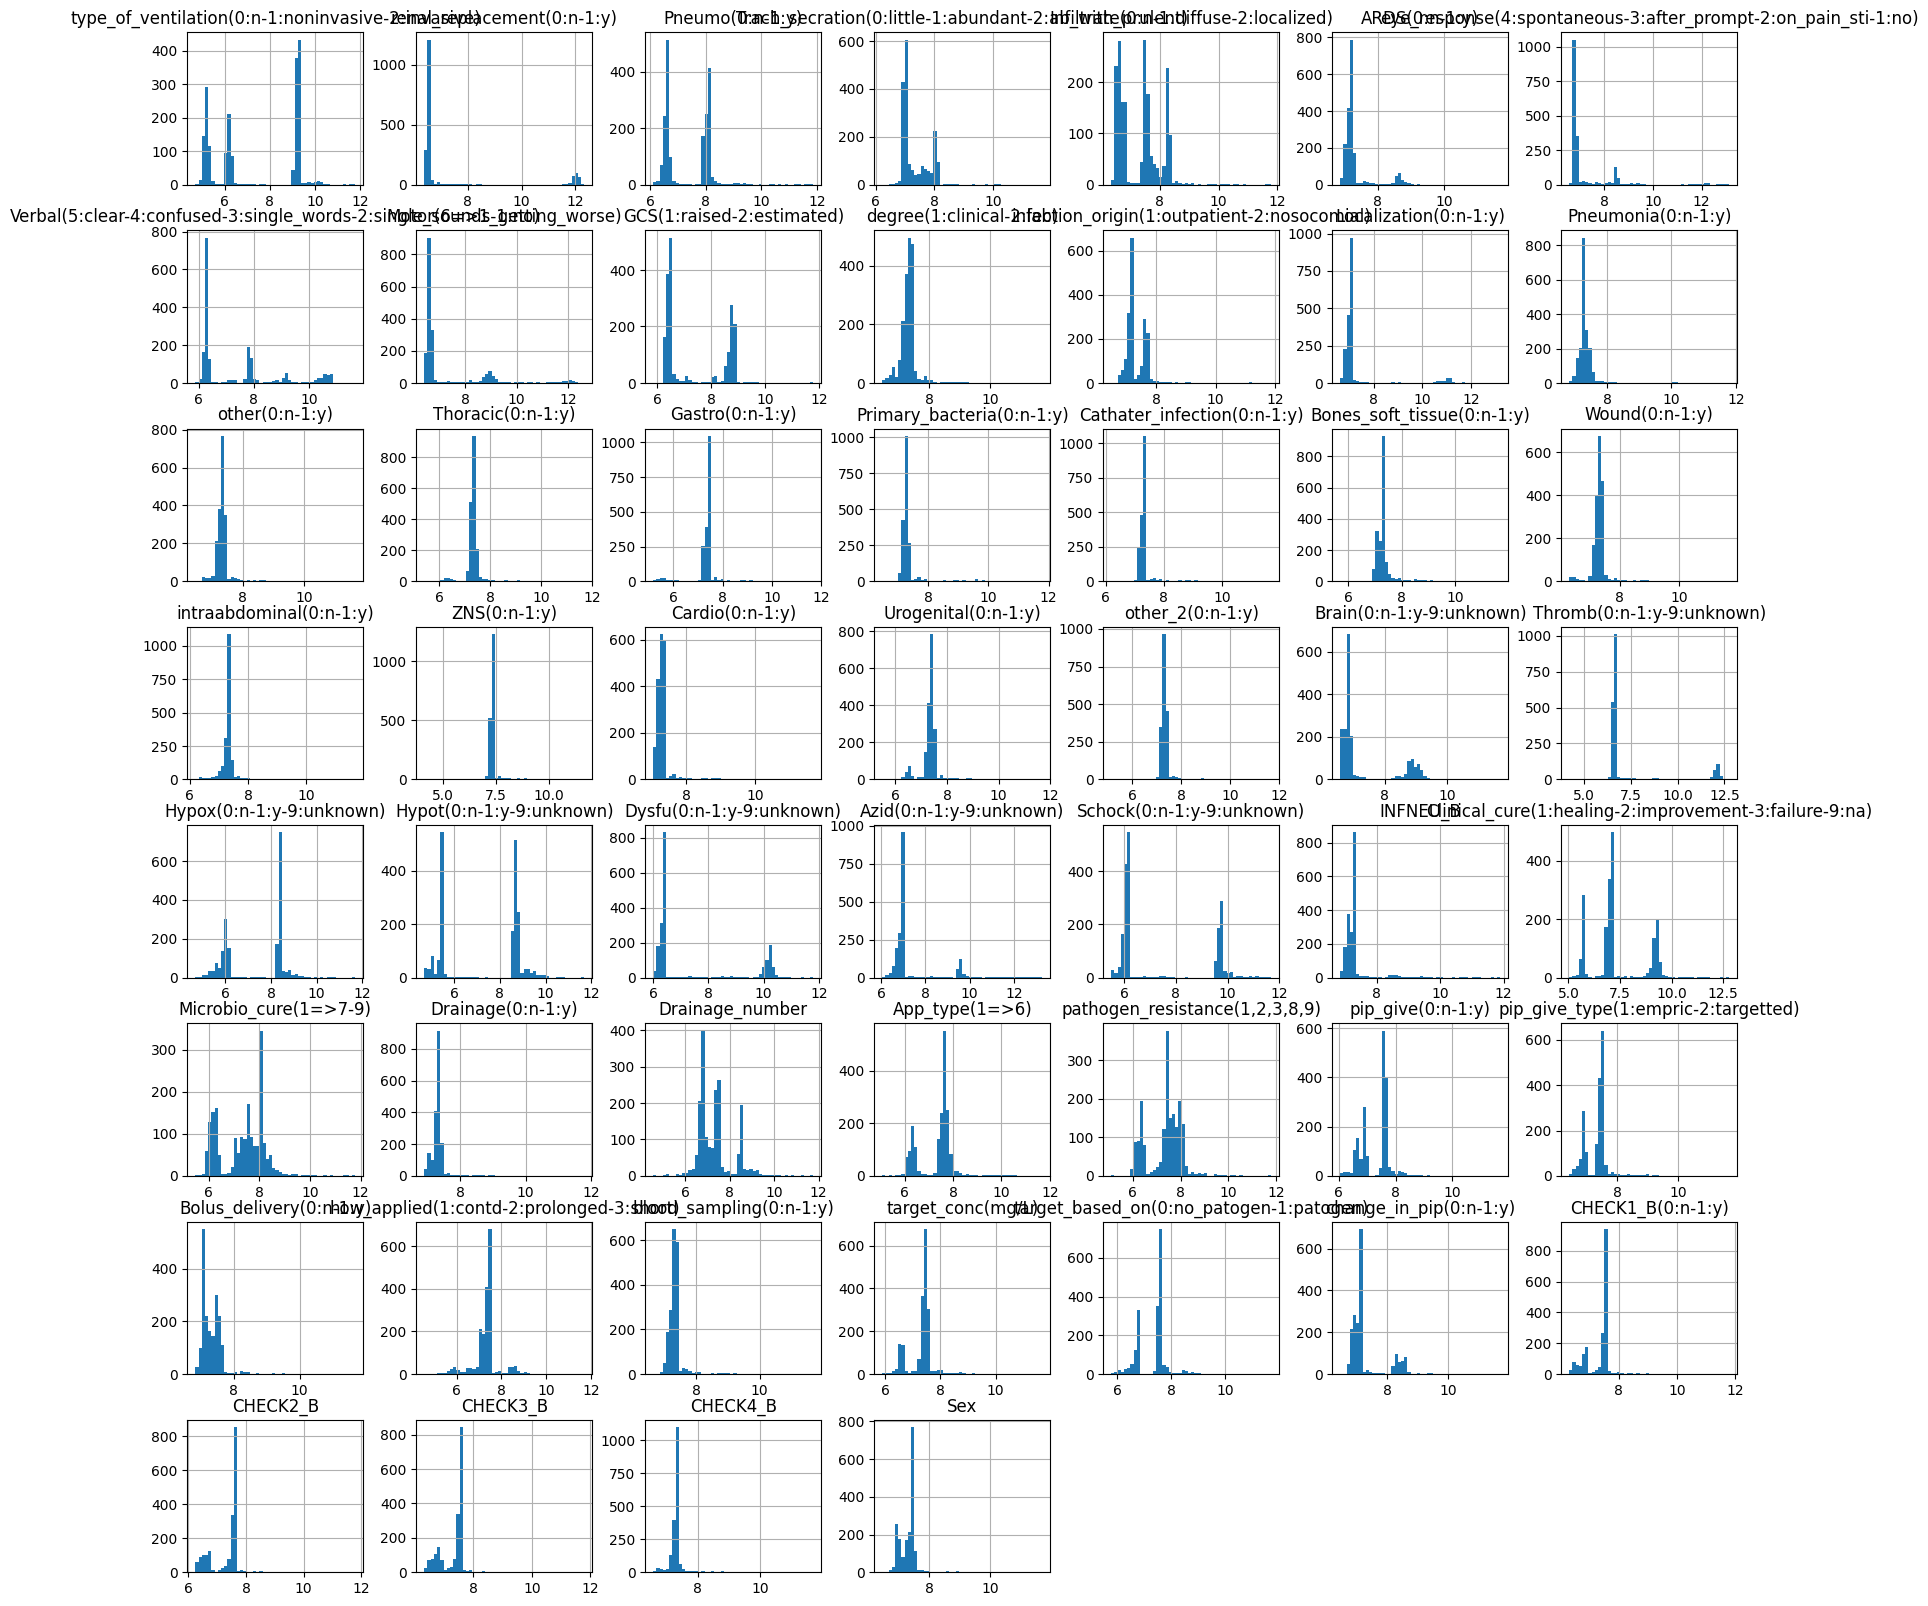

In [185]:
X_train_catboost.hist(bins=50, figsize = (20,20))

In [ ]:
X_train_catboost.nunique()

type_of_ventilation(0:n-1:noninvasive-2:invasive)                 1906
renal_replacement(0:n-1:y)                                        1906
Pneumo(0:n-1:y)                                                   1907
Trach_secration(0:little-1:abundant-2:ab_with_prulent)            1903
Infiltrate(0:n-1:diffuse-2:localized)                             1902
ARDS(0:n-1:y)                                                     1906
eye_response(4:spontaneous-3:after_prompt-2:on_pain_sti-1:no)     1903
Verbal(5:clear-4:confused-3:single_words-2:single_sounds-1:no)    1899
Motor(6=>1_getting_worse)                                         1896
GCS(1:raised-2:estimated)                                         1907
degree(1:clinical-2:lab)                                          1905
infection_origin(1:outpatient-2:nosocomial)                       1907
Localization(0:n-1:y)                                             1907
Pneumonia(0:n-1:y)                                                1905
other(

#### Linear Regresssion

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
y_predict = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.652


In [ ]:
# Baseline Model: CatBoost
#----------------------------------------------------
model.fit(X_train_catboost, y_train)
y_predict = model.predict(X_train_catboost)
# evaluate predictions
mae = mean_absolute_error(y_train, y_predict)
print('MAE for training data: %.3f' % mae)
#----------------------------------------------------
# evaluate the model
X_test_catboost = catBooster.transform(X_test.astype(str), y_test)
y_predict = model.predict(X_test_catboost)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE for test data: %.3f' % mae)

MAE for training data: 1.607
MAE for test data: 1.945


#### Random Forest

In [ ]:
# Random Forest Regressor
# Hyperparameters:
#You need to check model descriptions for the hyperparameters. 
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier
#-----------------------------------------------------------------
# Number of trees in the forest:
n_estimators = 100
# Number of features to consider when looking for the best split:
max_features='sqrt'
# Maximum depth of the tree:
max_depth = None
# Minimum number of samples required to split an internal node:
min_samples_split = 20
# Minimum number of samples required to be at a leaf node:
min_samples_leaf = 10
# Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
max_leaf_nodes = None
# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree:
bootstrap = False
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
oob_score = False
# Number of jobs to run in parallel. (-1) means use all.
n_jobs = -1
# Random state
random_state = 2021
# Criterion
criterion= 'absolute_error'
#-----------------------------------------------------------------
# Creating the classifier:
RFR = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,criterion=criterion)

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
RFR.fit(X_train, y_train)
# evaluate the model
y_predict = RFR.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.443


In [ ]:
# Baseline Model: CatBoost
#----------------------------------------------------
RFR.fit(X_train_catboost, y_train)
y_predict = RFR.predict(X_train_catboost)
# evaluate predictions
mae = mean_absolute_error(y_train, y_predict)
print('MAE for training data: %.3f' % mae)
#----------------------------------------------------
# evaluate the model
X_test_catboost = catBooster.transform(X_test.astype(str), y_test)
y_predict = RFR.predict(X_test_catboost)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE for test data: %.3f' % mae)

MAE for training data: 1.155
MAE for test data: 1.783


#### Support Vector Machines

In [ ]:
# Hyperparameters:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#
#__________________________________________________________________________________________
kernel='linear' 
gamma='scale' #Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. When scaled, uses 1 / (n_features * X.var()) as value of gamma.
C=1.0
epsilon=0.1    # Default
shrinking=True # Whether to use the shrinking heuristic. 
tol=0.00001
#Setting the model:
svr_basic = SVR(kernel= kernel, gamma=gamma, tol=tol, C=C, epsilon=epsilon, shrinking=shrinking)

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
svr_basic.fit(X_train, y_train)
# evaluate the model
y_predict = svr_basic.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.623


In [ ]:
# Baseline Model: CatBoost
#----------------------------------------------------
svr_basic.fit(X_train_catboost, y_train)
y_predict = svr_basic.predict(X_train_catboost)
# evaluate predictions
mae = mean_absolute_error(y_train, y_predict)
print('MAE for training data: %.3f' % mae)
#----------------------------------------------------
# evaluate the model
X_test_catboost = catBooster.transform(X_test.astype(str), y_test)
y_predict = svr_basic.predict(X_test_catboost)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE for test data: %.3f' % mae)

MAE for training data: 1.582
MAE for test data: 1.926


## Helmert Encoder

In [ ]:
# Helmert Encoder
# https://contrib.scikit-learn.org/category_encoders/helmert.html
helmert = ce.helmert.HelmertEncoder()
X_train_helmert = helmert.fit_transform(X_train.astype(str), y_train)
X_train_helmert.drop('intercept', axis=1, inplace=True)
X_train_helmert.head()

/usr/local/lib/python3.8/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


type_of_ventilation(0:n-1:noninvasive-2:invasive)_0  \
1064                                               -1.0     
866                                                 1.0     
554                                                -1.0     
89                                                 -1.0     
2051                                                1.0     

      type_of_ventilation(0:n-1:noninvasive-2:invasive)_1  \
1064                                               -1.0     
866                                                -1.0     
554                                                -1.0     
89                                                 -1.0     
2051                                               -1.0     

      renal_replacement(0:n-1:y)_0  Pneumo(0:n-1:y)_0  \
1064                          -1.0               -1.0   
866                            1.0                1.0   
554                           -1.0               -1.0   
89                             1.0                1.0   
2051                           1.0                1.0   

      Trach_secration(0:little-1:abundant-2:ab_with_prulent)_0  \
1064                                               -1.0          
866                                                -1.0          
554                                                 1.0          
89                                                  1.0          
2051                                               -1.0          

      Trach_secration(0:little-1:abundant-2:ab_with_prulent)_1  \
1064                                               -1.0          
866                                                -1.0          
554                                                -1.0          
89                                                 -1.0          
2051                                               -1.0          

      Infiltrate(0:n-1:diffuse-2:localized)_0  \
1064                                     -1.0   
866                                       1.0   
554                                      -1.0   
89                                        1.0   
2051                                      0.0   

      Infiltrate(0:n-1:diffuse-2:localized)_1  ARDS(0:n-1:y)_0  \
1064                                     -1.0             -1.0   
866                                      -1.0             -1.0   
554                                      -1.0             -1.0   
89                                       -1.0             -1.0   
2051                                      2.0             -1.0   

      eye_response(4:spontaneous-3:after_prompt-2:on_pain_sti-1:no)_0  ...  \
1064                                               -1.0                ...   
866                                                -1.0                ...   
554                                                -1.0                ...   
89                                                 -1.0                ...   
2051                                                1.0                ...   

      target_conc(mg/L)_6  target_conc(mg/L)_7  target_conc(mg/L)_8  \
1064                 -1.0                 -1.0                 -1.0   
866                  -1.0                 -1.0                 -1.0   
554                  -1.0                 -1.0                 -1.0   
89                   -1.0                 -1.0                 -1.0   
2051                 -1.0                 -1.0                 -1.0   

      target_based_on(0:no_patogen-1:patogen)_0  change_in_pip(0:n-1:y)_0  \
1064                                       -1.0                      -1.0   
866                                        -1.0                      -1.0   
554                                        -1.0                      -1.0   
89                                          1.0                       1.0   
2051                                       -1.0                      -1.0   

      CHECK1_B(0:n-1:y)_0  CHECK2_B_0  CHECK3_B_0  CHECK4_B_0  Sex_0  
1064         

#### Linear Regresssion

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
y_predict = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.652


In [ ]:
# Baseline Model: Helmert
#----------------------------------------------------
model.fit(X_train_helmert, y_train)
y_predict = model.predict(X_train_helmert)
# evaluate predictions
mae = mean_absolute_error(y_train, y_predict)
print('MAE for training data: %.3f' % mae)
#----------------------------------------------------
# evaluate the model
X_test_helmert = helmert.transform(X_test.astype(str), y_test)
X_test_helmert.drop('intercept', axis=1, inplace=True)
y_predict = model.predict(X_test_helmert)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE for test data: %.3f' % mae)

MAE for training data: 1.468
MAE for test data: 1.553


/usr/local/lib/python3.8/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


#### Random Forest

In [ ]:
# Random Forest Regressor
# Hyperparameters:
#You need to check model descriptions for the hyperparameters. 
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier
#-----------------------------------------------------------------
# Number of trees in the forest:
n_estimators = 100
# Number of features to consider when looking for the best split:
max_features='sqrt'
# Maximum depth of the tree:
max_depth = None
# Minimum number of samples required to split an internal node:
min_samples_split = 20
# Minimum number of samples required to be at a leaf node:
min_samples_leaf = 10
# Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
max_leaf_nodes = None
# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree:
bootstrap = False
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
oob_score = False
# Number of jobs to run in parallel. (-1) means use all.
n_jobs = -1
# Random state
random_state = 2021
# Criterion
criterion= 'absolute_error'
#-----------------------------------------------------------------
# Creating the classifier:
RFR = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,criterion=criterion)

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
RFR.fit(X_train, y_train)
# evaluate the model
y_predict = RFR.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.443


In [ ]:
# Baseline Model: Helmert
#----------------------------------------------------
RFR.fit(X_train_helmert, y_train)
y_predict = RFR.predict(X_train_helmert)
# evaluate predictions
mae = mean_absolute_error(y_train, y_predict)
print('MAE for training data: %.3f' % mae)
#----------------------------------------------------
# evaluate the model
X_test_helmert = helmert.transform(X_test.astype(str), y_test)
X_test_helmert.drop('intercept', axis=1, inplace=True)
y_predict = RFR.predict(X_test_helmert)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE for test data: %.3f' % mae)

MAE for training data: 1.319
MAE for test data: 1.477


/usr/local/lib/python3.8/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


#### Support Vector Machines

In [ ]:
# Hyperparameters:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#
#__________________________________________________________________________________________
kernel='linear' 
gamma='scale' #Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. When scaled, uses 1 / (n_features * X.var()) as value of gamma.
C=1.0
epsilon=0.1    # Default
shrinking=True # Whether to use the shrinking heuristic. 
tol=0.00001
#Setting the model:
svr_basic = SVR(kernel= kernel, gamma=gamma, tol=tol, C=C, epsilon=epsilon, shrinking=shrinking)

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
svr_basic.fit(X_train, y_train)
# evaluate the model
y_predict = svr_basic.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.623


In [ ]:
# Baseline Model: Helmert
#----------------------------------------------------
svr_basic.fit(X_train_helmert, y_train)
y_predict = svr_basic.predict(X_train_helmert)
# evaluate predictions
mae = mean_absolute_error(y_train, y_predict)
print('MAE for training data: %.3f' % mae)
#----------------------------------------------------
# evaluate the model
X_test_helmert = helmert.transform(X_test.astype(str), y_test)
X_test_helmert.drop('intercept', axis=1, inplace=True)
y_predict = svr_basic.predict(X_test_helmert)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE for test data: %.3f' % mae)

MAE for training data: 1.431
MAE for test data: 1.579


/usr/local/lib/python3.8/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


##  Sum Encoder

In [ ]:
# Sum Encoder
# https://contrib.scikit-learn.org/category_encoders/helmert.html
sum_encode = ce.sum_coding.SumEncoder()
X_train_sum = sum_encode.fit_transform(X_train.astype(str), y_train)
X_train_sum.drop('intercept', axis=1, inplace=True)
X_train_sum.head()
#https://contrib.scikit-learn.org/category_encoders/sum.html


/usr/local/lib/python3.8/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


type_of_ventilation(0:n-1:noninvasive-2:invasive)_0  \
1064                                                1.0     
866                                                 0.0     
554                                                 1.0     
89                                                  1.0     
2051                                                0.0     

      type_of_ventilation(0:n-1:noninvasive-2:invasive)_1  \
1064                                                0.0     
866                                                 1.0     
554                                                 0.0     
89                                                  0.0     
2051                                                1.0     

      renal_replacement(0:n-1:y)_0  Pneumo(0:n-1:y)_0  \
1064                           1.0                1.0   
866                           -1.0               -1.0   
554                            1.0                1.0   
89                            -1.0               -1.0   
2051                          -1.0               -1.0   

      Trach_secration(0:little-1:abundant-2:ab_with_prulent)_0  \
1064                                                1.0          
866                                                 1.0          
554                                                 0.0          
89                                                  0.0          
2051                                                1.0          

      Trach_secration(0:little-1:abundant-2:ab_with_prulent)_1  \
1064                                                0.0          
866                                                 0.0          
554                                                 1.0          
89                                                  1.0          
2051                                                0.0          

      Infiltrate(0:n-1:diffuse-2:localized)_0  \
1064                                      1.0   
866                                       0.0   
554                                       1.0   
89                                        0.0   
2051                                     -1.0   

      Infiltrate(0:n-1:diffuse-2:localized)_1  ARDS(0:n-1:y)_0  \
1064                                      0.0              1.0   
866                                       1.0              1.0   
554                                       0.0              1.0   
89                                        1.0              1.0   
2051                                     -1.0              1.0   

      eye_response(4:spontaneous-3:after_prompt-2:on_pain_sti-1:no)_0  ...  \
1064                                                1.0                ...   
866                                                 1.0                ...   
554                                                 1.0                ...   
89                                                  1.0                ...   
2051                                                0.0                ...   

      target_conc(mg/L)_6  target_conc(mg/L)_7  target_conc(mg/L)_8  \
1064                  0.0                  0.0                  0.0   
866                   0.0                  0.0                  0.0   
554                   0.0                  0.0                  0.0   
89                    0.0                  0.0                  0.0   
2051                  0.0                  0.0                  0.0   

      target_based_on(0:no_patogen-1:patogen)_0  change_in_pip(0:n-1:y)_0  \
1064                                        1.0                       1.0   
866                                         1.0                       1.0   
554                                         1.0                       1.0   
89                                         -1.0                      -1.0   
2051                                        1.0                       1.0   

      CHECK1_B(0:n-1:y)_0  CHECK2_B_0  CHECK3_B_0  CHECK4_B_0  Sex_0  
1064         

#### Linear Regresssion

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
y_predict = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.652


In [ ]:
# Baseline Model: Sum
#----------------------------------------------------
model.fit(X_train_sum, y_train)
y_predict = model.predict(X_train_sum)
# evaluate predictions
mae = mean_absolute_error(y_train, y_predict)
print('MAE for training data: %.3f' % mae)
#----------------------------------------------------
# evaluate the model
X_test_sum = sum_encode.transform(X_test.astype(str), y_test)
X_test_sum.drop('intercept', axis=1, inplace=True)
y_predict = model.predict(X_test_sum)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE for test data: %.3f' % mae)

MAE for training data: 1.468
MAE for test data: 1.554


/usr/local/lib/python3.8/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


#### Random Forest

In [ ]:
# Random Forest Regressor
# Hyperparameters:
#You need to check model descriptions for the hyperparameters. 
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier
#-----------------------------------------------------------------
# Number of trees in the forest:
n_estimators = 100
# Number of features to consider when looking for the best split:
max_features='sqrt'
# Maximum depth of the tree:
max_depth = None
# Minimum number of samples required to split an internal node:
min_samples_split = 20
# Minimum number of samples required to be at a leaf node:
min_samples_leaf = 10
# Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
max_leaf_nodes = None
# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree:
bootstrap = False
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
oob_score = False
# Number of jobs to run in parallel. (-1) means use all.
n_jobs = -1
# Random state
random_state = 2021
# Criterion
criterion= 'absolute_error'
#-----------------------------------------------------------------
# Creating the classifier:
RFR = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,criterion=criterion)

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
RFR.fit(X_train, y_train)
# evaluate the model
y_predict = RFR.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.443


In [ ]:
# Baseline Model: Sum
#----------------------------------------------------
RFR.fit(X_train_sum, y_train)
y_predict = RFR.predict(X_train_sum)
# evaluate predictions
mae = mean_absolute_error(y_train, y_predict)
print('MAE for training data: %.3f' % mae)
#----------------------------------------------------
# evaluate the model
X_test_sum = sum_encode.transform(X_test.astype(str), y_test)
X_test_sum.drop('intercept', axis=1, inplace=True)
y_predict = RFR.predict(X_test_sum)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE for test data: %.3f' % mae)

MAE for training data: 1.313
MAE for test data: 1.469


/usr/local/lib/python3.8/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


#### Support Vector Machines

In [ ]:
# Hyperparameters:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#
#__________________________________________________________________________________________
kernel='linear' 
gamma='scale' #Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. When scaled, uses 1 / (n_features * X.var()) as value of gamma.
C=1.0
epsilon=0.1    # Default
shrinking=True # Whether to use the shrinking heuristic. 
tol=0.00001
#Setting the model:
svr_basic = SVR(kernel= kernel, gamma=gamma, tol=tol, C=C, epsilon=epsilon, shrinking=shrinking)

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
svr_basic.fit(X_train, y_train)
# evaluate the model
y_predict = svr_basic.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.623


In [ ]:
# Baseline Model: Sum
#----------------------------------------------------
svr_basic.fit(X_train_sum, y_train)
y_predict = svr_basic.predict(X_train_sum)
# evaluate predictions
mae = mean_absolute_error(y_train, y_predict)
print('MAE for training data: %.3f' % mae)
#----------------------------------------------------
# evaluate the model
X_test_sum = sum_encode.transform(X_test.astype(str), y_test)
X_test_sum.drop('intercept', axis=1, inplace=True)
y_predict = svr_basic.predict(X_test_sum)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE for test data: %.3f' % mae)

MAE for training data: 1.432
MAE for test data: 1.571


/usr/local/lib/python3.8/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


# Feature Selection

## Categorical => categorical

### Chi-Squared 

In [ ]:
fs_chi = SelectKBest(score_func=chi2, k='all')
fs_chi.fit(X_train, y_train)
X_train_chi = fs_chi.transform(X_train)

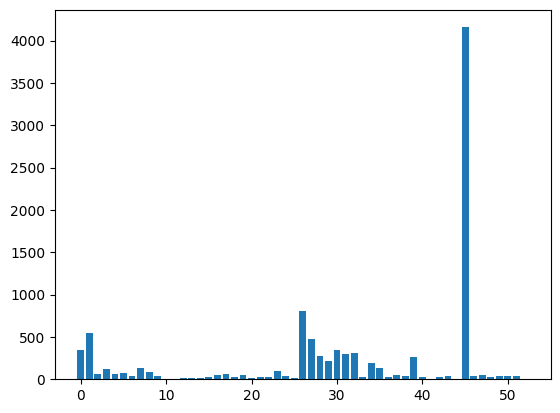

In [ ]:
# plot the scores
plt.bar([i for i in range(len(fs_chi.scores_))], fs_chi.scores_)
plt.show()

### Mutual information

In [ ]:
fs_mi = SelectKBest(score_func=mutual_info_classif, k='all')
fs_mi.fit(X_train, y_train)
X_train_mi = fs_mi.transform(X_train)

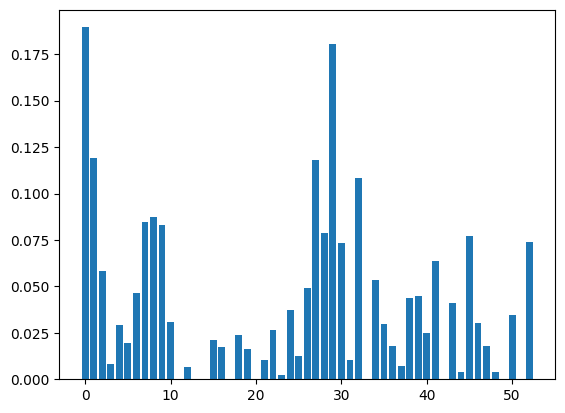

In [ ]:
# plot the scores
plt.bar([i for i in range(len(fs_mi.scores_))], fs_mi.scores_)
plt.show()

# Feature Selection










## Data Scaling w/o leakage

In [ ]:
X_train = X_train_catboost
X_test = X_test_catboost

In [ ]:
# Fit on the training dataset
#Rescaling the data
featuresToScale = X_train.columns
sX = StandardScaler(copy=True)
sX.fit(X_train[featuresToScale])
# scale the training dataset
X_train.loc[:,featuresToScale] = sX.transform(X_train[featuresToScale])
# scale the test dataset
X_test.loc[:,featuresToScale] = sX.transform(X_test)

## Filter Methods: Numerical => `Numerical`

### Pearson’s correlation coefficient => Linear

Correlation is a measure of how two variables change together.  Pearson’s correlation is a measure of linear correlation between two sets of data. 

It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. 



In [ ]:
'''
SelectKBest: Select features according to the k highest scores
----------------------------------------------------------
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
'''
# Select all features to see their relative impact: here the score function is changed!
pearson = SelectKBest(score_func=f_regression, k='all')
# Fitting:
pearson.fit(X_train, y_train)
# transform:
X_train_pearson = pearson.transform(X_train)

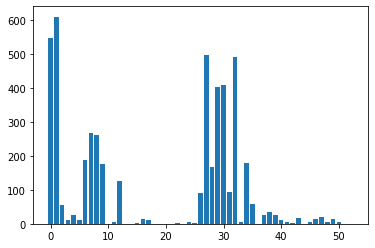

In [ ]:
# plot the scores
plt.bar([i for i in range(len(pearson.scores_))], pearson.scores_)
plt.show()

### Mutual Information

In [ ]:
# configure to select all features
mi = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
mi.fit(X_train, y_train)
X_train_mi = mi.transform(X_train)

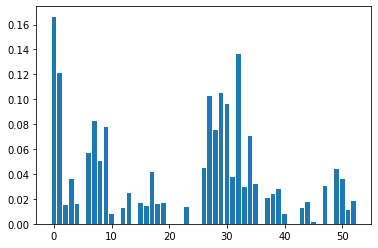

In [ ]:
# plot the scores
plt.bar([i for i in range(len(mi.scores_))], mi.scores_)
plt.show()

### Assessment for Feature Selection Capabilities: Pearson

#### Linear Regresssion

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
y_predict = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.945


In [ ]:
# Baseline Model: Pearson
#----------------------------------------------------
# fit the model with X_pearson --- default settings ---
#----------------------------------------------------
# Select all features to see their relative impact:
pearson = SelectKBest(score_func=f_regression, k=16)
# Fitting:
pearson.fit(X_train, y_train)
# transform:
X_train_pearson = pearson.transform(X_train)
model = LinearRegression()
model.fit(X_train_pearson, y_train)
# evaluate the model
X_test_pearson = pearson.transform(X_test)
y_predict = model.predict(X_test_pearson)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.824


#### Random Forest

In [ ]:
# Random Forest Regressor
# Hyperparameters:
#You need to check model descriptions for the hyperparameters. 
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier
#-----------------------------------------------------------------
# Number of trees in the forest:
n_estimators = 100
# Number of features to consider when looking for the best split:
max_features='sqrt'
# Maximum depth of the tree:
max_depth = None
# Minimum number of samples required to split an internal node:
min_samples_split = 20
# Minimum number of samples required to be at a leaf node:
min_samples_leaf = 10
# Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
max_leaf_nodes = None
# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree:
bootstrap = False
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
oob_score = False
# Number of jobs to run in parallel. (-1) means use all.
n_jobs = -1
# Random state
random_state = 2021
# Criterion
criterion= 'absolute_error'
#-----------------------------------------------------------------
# Creating the classifier:
RFR = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,criterion=criterion)

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
RFR.fit(X_train, y_train)
# evaluate the model
y_predict = RFR.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.783


In [ ]:
# Baseline Model: Pearson
#----------------------------------------------------
# fit the model with X_pearson 
#----------------------------------------------------
# Select all features to see their relative impact:
pearson = SelectKBest(score_func=f_regression, k=16)
# Fitting:
pearson.fit(X_train, y_train)
# transform:
X_train_pearson = pearson.transform(X_train)
RFR.fit(X_train_pearson, y_train)
# evaluate the model
X_test_pearson = pearson.transform(X_test)
y_predict = RFR.predict(X_test_pearson)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.744


#### Support Vector Machines

In [ ]:
# Hyperparameters:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#
#__________________________________________________________________________________________
kernel='linear' 
gamma='scale' #Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. When scaled, uses 1 / (n_features * X.var()) as value of gamma.
C=1.0
epsilon=0.1    # Default
shrinking=True # Whether to use the shrinking heuristic. 
tol=0.00001
#Setting the model:
svr_basic = SVR(kernel= kernel, gamma=gamma, tol=tol, C=C, epsilon=epsilon, shrinking=shrinking)

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
svr_basic.fit(X_train, y_train)
# evaluate the model
y_predict = svr_basic.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.941


In [ ]:
# Baseline Model: Pearson
#----------------------------------------------------
# fit the model with X_pearson 
#----------------------------------------------------
# Select all features to see their relative impact:
pearson = SelectKBest(score_func=f_regression, k=16)
# Fitting:
pearson.fit(X_train, y_train)
# transform:
X_train_pearson = pearson.transform(X_train)
svr_basic.fit(X_train_pearson, y_train)
# evaluate the model
X_test_pearson = pearson.transform(X_test)
y_predict = svr_basic.predict(X_test_pearson)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.812


#### Looping: LR with Pearson

Lets loop over increasing number of features:






In [ ]:
# Scanning through N number of features:
num_features = [i+1 for i in range(X_train.shape[1])]
# enumerate each number of features
results = list()

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
  scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  return scores

In [ ]:
model

LinearRegression()

In [ ]:
# enumerate each number of features
results = list()
for k in num_features:
  # create pipeline
  fs_pearson = SelectKBest(score_func=f_regression, k=k)
  pipeline = Pipeline(steps=[('pearson',fs_pearson), ('LR', model)])
  # evaluate the model
  scores = evaluate_model(pipeline)
  results.append(scores)
  # summarize the results
  print('%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

1 -2.564 (0.126)
2 -2.298 (0.109)
3 -2.147 (0.102)
4 -1.957 (0.104)
5 -1.943 (0.106)
6 -1.913 (0.107)
7 -1.830 (0.116)
8 -1.800 (0.117)
9 -1.799 (0.116)
10 -1.790 (0.115)
11 -1.782 (0.111)
12 -1.772 (0.110)
13 -1.763 (0.111)
14 -1.764 (0.111)
15 -1.764 (0.111)
16 -1.761 (0.109)
17 -1.761 (0.108)
18 -1.761 (0.108)
19 -1.763 (0.107)
20 -1.762 (0.107)
21 -1.763 (0.108)
22 -1.762 (0.110)
23 -1.756 (0.112)
24 -1.751 (0.112)
25 -1.749 (0.110)
26 -1.740 (0.111)
27 -1.738 (0.112)
28 -1.730 (0.111)
29 -1.723 (0.110)
30 -1.715 (0.109)
31 -1.712 (0.107)
32 -1.711 (0.107)
33 -1.710 (0.108)
34 -1.708 (0.109)
35 -1.706 (0.109)
36 -1.706 (0.110)
37 -1.707 (0.112)
38 -1.706 (0.110)
39 -1.706 (0.111)
40 -1.705 (0.112)
41 -1.703 (0.112)
42 -1.692 (0.113)
43 -1.686 (0.114)
44 -1.683 (0.113)
45 -1.681 (0.113)
46 -1.677 (0.113)
47 -1.673 (0.113)
48 -1.667 (0.113)
49 -1.667 (0.114)
50 -1.665 (0.115)
51 -1.662 (0.114)
52 -1.660 (0.114)
53 -1.658 (0.111)


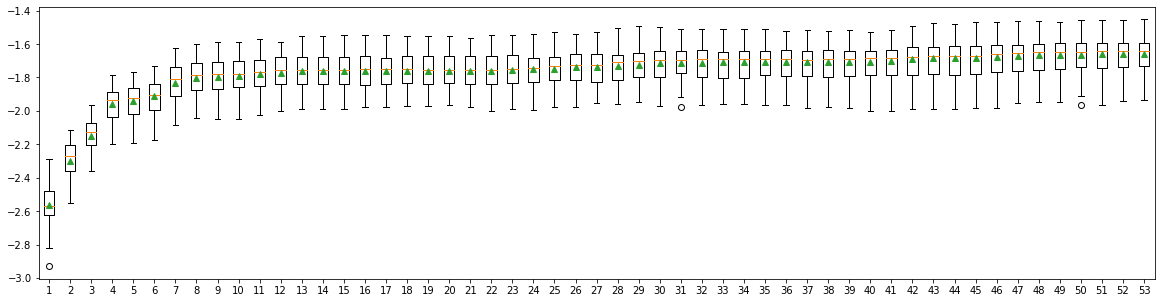

In [ ]:
# plot model performance:
plt.figure(figsize=(20,5))
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

### Assessment for Feature Selection Capabilities: MI

#### Linear Regresssion

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
y_predict = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.945


In [ ]:
# Baseline Model: MI
#----------------------------------------------------
# fit the model with X_mi --- default settings ---
#----------------------------------------------------
# Select all features to see their relative impact:
mi = SelectKBest(score_func=mutual_info_regression, k=16)
# Fitting:
mi.fit(X_train, y_train)
# transform:
X_train_mi = mi.transform(X_train)
model = LinearRegression()
model.fit(X_train_mi, y_train)
# evaluate the model
X_test_mi = mi.transform(X_test)
y_predict = model.predict(X_test_mi)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.780


#### Random Forest

In [ ]:
# Random Forest Regressor
# Hyperparameters:
#You need to check model descriptions for the hyperparameters. 
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier
#-----------------------------------------------------------------
# Number of trees in the forest:
n_estimators = 100
# Number of features to consider when looking for the best split:
max_features='sqrt'
# Maximum depth of the tree:
max_depth = None
# Minimum number of samples required to split an internal node:
min_samples_split = 20
# Minimum number of samples required to be at a leaf node:
min_samples_leaf = 10
# Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
max_leaf_nodes = None
# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree:
bootstrap = False
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
oob_score = False
# Number of jobs to run in parallel. (-1) means use all.
n_jobs = -1
# Random state
random_state = 2021
# Criterion
criterion= 'absolute_error'
#-----------------------------------------------------------------
# Creating the classifier:
RFR = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,criterion=criterion)

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
RFR.fit(X_train, y_train)
# evaluate the model
y_predict = RFR.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.783


In [ ]:
# Baseline Model: MI
#----------------------------------------------------
# fit the model with X_mi --- default settings ---
#----------------------------------------------------
# Select all features to see their relative impact:
mi = SelectKBest(score_func=mutual_info_regression, k=16)
# Fitting:
mi.fit(X_train, y_train)
# transform:
X_train_mi = mi.transform(X_train)
RFR.fit(X_train_mi, y_train)
# evaluate the model
X_test_mi = mi.transform(X_test)
y_predict = RFR.predict(X_test_mi)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.717


#### Support Vector Machines

In [ ]:
# Hyperparameters:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#
#__________________________________________________________________________________________
kernel='linear' 
gamma='scale' #Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. When scaled, uses 1 / (n_features * X.var()) as value of gamma.
C=1.0
epsilon=0.1    # Default
shrinking=True # Whether to use the shrinking heuristic. 
tol=0.00001
#Setting the model:
svr_basic = SVR(kernel= kernel, gamma=gamma, tol=tol, C=C, epsilon=epsilon, shrinking=shrinking)

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
svr_basic.fit(X_train, y_train)
# evaluate the model
y_predict = svr_basic.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.941


In [ ]:
# Baseline Model: MI
#----------------------------------------------------
# fit the model with X_mi --- default settings ---
#----------------------------------------------------
# Select all features to see their relative impact:
mi = SelectKBest(score_func=mutual_info_regression, k=16)
# Fitting:
mi.fit(X_train, y_train)
# transform:
X_train_mi = mi.transform(X_train)
svr_basic.fit(X_train_mi, y_train)
# evaluate the model
X_test_mi = mi.transform(X_test)
y_predict = svr_basic.predict(X_test_mi)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.761


#### Looping: LR with MI

Lets loop over increasing number of features:






In [ ]:
# Scanning through N number of features:
num_features = [i+1 for i in range(X_train.shape[1])]
# enumerate each number of features
results = list()

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
  scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  return scores

In [ ]:
model

LinearRegression()

In [ ]:
# enumerate each number of features
results = list()
for k in num_features:
  # create pipeline
  fs_mi = SelectKBest(score_func=mutual_info_regression, k=k)
  pipeline = Pipeline(steps=[('mi',fs_mi), ('LR', model)])
  # evaluate the model
  scores = evaluate_model(pipeline)
  results.append(scores)
  # summarize the results
  print('%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

1 -2.595 (0.154)
2 -2.399 (0.146)
3 -2.110 (0.119)
4 -2.020 (0.122)
5 -1.953 (0.108)
6 -1.908 (0.111)
7 -1.866 (0.116)
8 -1.825 (0.126)
9 -1.809 (0.125)
10 -1.791 (0.116)
11 -1.781 (0.114)
12 -1.775 (0.113)
13 -1.769 (0.113)
14 -1.766 (0.114)
15 -1.764 (0.116)
16 -1.760 (0.112)
17 -1.751 (0.113)
18 -1.745 (0.113)
19 -1.736 (0.121)
20 -1.734 (0.117)
21 -1.729 (0.119)
22 -1.728 (0.119)
23 -1.725 (0.118)
24 -1.721 (0.116)
25 -1.717 (0.113)
26 -1.710 (0.114)
27 -1.704 (0.112)
28 -1.702 (0.113)
29 -1.699 (0.115)
30 -1.692 (0.113)
31 -1.691 (0.110)
32 -1.688 (0.110)
33 -1.685 (0.109)
34 -1.679 (0.113)
35 -1.677 (0.111)
36 -1.675 (0.113)
37 -1.673 (0.108)
38 -1.675 (0.111)
39 -1.670 (0.110)
40 -1.667 (0.110)
41 -1.668 (0.110)
42 -1.668 (0.113)
43 -1.668 (0.112)
44 -1.666 (0.113)
45 -1.667 (0.110)
46 -1.667 (0.112)
47 -1.667 (0.109)
48 -1.666 (0.110)
49 -1.666 (0.111)
50 -1.664 (0.111)
51 -1.662 (0.112)
52 -1.660 (0.112)
53 -1.658 (0.111)


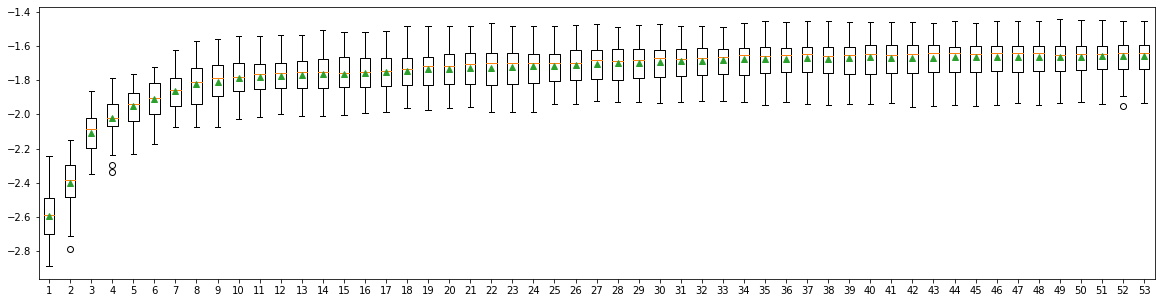

In [ ]:
# plot model performance:
plt.figure(figsize=(20,5))
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

## Wrapper I: Recursive Feature Elimination

RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection methods under the hood. 

RFE searches for a subset of features by starting with all features. It removes the features iteratively until N number of features remain. 

This is done by:

1. fitting a ML model for feature set i, 
2. ranking features by importance, discarding the least important features,
3. re-fitting the model. 

The process is repeated until a specified number of features remains. Features are scored either using the provided machine learning model or via deploying a filter.



### RFE Class Scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

The class is configured with two main arguments:

+ estimator: algorithm specified 
+ n_features_to_select: number of features 

One important note here is that fit method of the estimator must provide information about feature importance (e.g. coef_, feature_importances_)

The goal  is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.


**Note**: The hyperparameter `importance_getterstr` is by default=’auto’.    If ‘auto’, uses the feature importance either through a coef_ or feature_importances_ attributes of estimator. But it also accepts a string that specifies an attribute name/path for extracting feature importance (implemented with attrgetter). For example, give regressor_.coef_ in case of TransformedTargetRegressor or named_steps.clf.feature_importances_ in case of class:~sklearn.pipeline.Pipeline with its last step named clf.

#### Determining number of features -- RFR

1. Select a model that can decide feature importance
2. Create a model dict. to loop over with changing feature numbers
3. Apply cv for each feature set
4. Store scores
5. Visualize the scores.

In [ ]:
lin_reg = LinearRegression()
def get_models():
  models = dict()
  for i in range(2, X_train.shape[1]):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
    models[str(i)] = Pipeline(steps=[('s',rfe),('m',lin_reg)])
  return models

In [ ]:
# Model evaluation via cross-validation:
def evaluate_model(model, X, y):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=16)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  return scores

In [ ]:
#RFE loop:
#---------------------------
# get the models to evaluate
models = get_models()
#---------------------------
# Model evaluation and book keeping:
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X_train, y_train)
  results.append(scores)
  names.append(name)
  print('%s => %.3f (%.3f)' % (name, mean(scores), std(scores)))

2 => -2.305 (0.126)
3 => -2.121 (0.140)
4 => -1.956 (0.122)
5 => -1.890 (0.119)
6 => -1.856 (0.115)
7 => -1.828 (0.117)
8 => -1.821 (0.115)
9 => -1.812 (0.121)
10 => -1.801 (0.118)
11 => -1.778 (0.116)
12 => -1.763 (0.118)
13 => -1.748 (0.114)
14 => -1.722 (0.106)
15 => -1.709 (0.104)
16 => -1.703 (0.106)
17 => -1.692 (0.108)
18 => -1.692 (0.106)
19 => -1.690 (0.104)
20 => -1.689 (0.107)
21 => -1.685 (0.106)
22 => -1.683 (0.103)
23 => -1.684 (0.101)
24 => -1.681 (0.101)
25 => -1.680 (0.098)
26 => -1.679 (0.099)
27 => -1.677 (0.098)
28 => -1.677 (0.096)
29 => -1.675 (0.095)
30 => -1.675 (0.096)
31 => -1.672 (0.095)
32 => -1.671 (0.096)
33 => -1.670 (0.095)
34 => -1.669 (0.095)
35 => -1.668 (0.094)
36 => -1.669 (0.093)
37 => -1.667 (0.094)
38 => -1.666 (0.095)
39 => -1.665 (0.095)
40 => -1.665 (0.095)
41 => -1.664 (0.095)
42 => -1.664 (0.094)
43 => -1.663 (0.094)
44 => -1.661 (0.095)
45 => -1.660 (0.096)
46 => -1.659 (0.096)
47 => -1.658 (0.096)
48 => -1.657 (0.096)
49 => -1.657 (0.096)


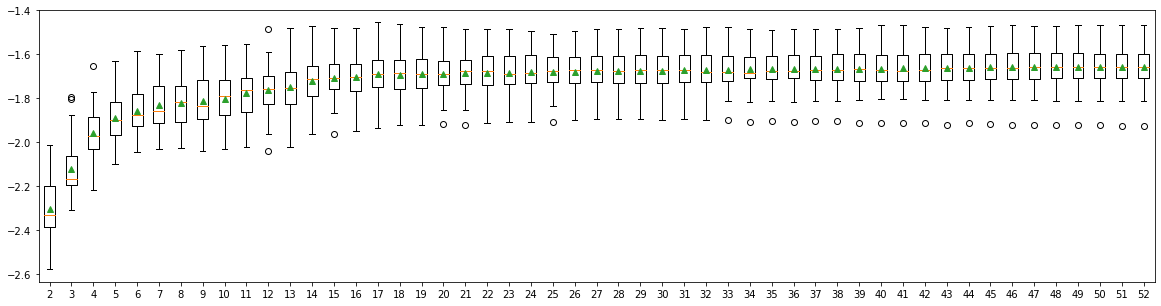

In [ ]:
# plot model performance:
plt.figure(figsize=(20,5))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
# Checking the selected features:
#----------------------------------
# define RFE
rfe_model = RFE(estimator=LinearRegression(), n_features_to_select=14)
# fit RFE
rfe_model.fit(X_train, y_train)
# checking the selected features:
#---------------------------------
#ranking_ndarray of shape (n_features,): The feature ranking, such that ranking_[i] corresponds to the ranking position
#                                        of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.
#--------
#support_ndarray of shape (n_features,): The mask of selected features.
#---------------------------------

RFE(estimator=LinearRegression(), n_features_to_select=14)

In [ ]:
for i in range(X_train.shape[1]):
  print('Column: %s, Selected?=%s, Rank: %d' % (X_train.columns[i], rfe_model.support_[i], rfe_model.ranking_[i]))

Column: type_of_ventilation(0:n-1:noninvasive-2:invasive), Selected?=True, Rank: 1
Column: renal_replacement(0:n-1:y), Selected?=True, Rank: 1
Column: Pneumo(0:n-1:y), Selected?=False, Rank: 22
Column: Trach_secration(0:little-1:abundant-2:ab_with_prulent), Selected?=False, Rank: 23
Column: Infiltrate(0:n-1:diffuse-2:localized), Selected?=False, Rank: 40
Column: ARDS(0:n-1:y), Selected?=False, Rank: 25
Column: eye_response(4:spontaneous-3:after_prompt-2:on_pain_sti-1:no), Selected?=False, Rank: 4
Column: Verbal(5:clear-4:confused-3:single_words-2:single_sounds-1:no), Selected?=True, Rank: 1
Column: Motor(6=>1_getting_worse), Selected?=True, Rank: 1
Column: GCS(1:raised-2:estimated), Selected?=False, Rank: 39
Column: degree(1:clinical-2:lab), Selected?=False, Rank: 6
Column: infection_origin(1:outpatient-2:nosocomial), Selected?=False, Rank: 10
Column: Localization(0:n-1:y), Selected?=True, Rank: 1
Column: Pneumonia(0:n-1:y), Selected?=False, Rank: 35
Column: other(0:n-1:y), Selected?=F

#### Determining number of features -- Lasso

1. Select a model that can decide feature importance
2. Create a model dict. to loop over with changing feature numbers
3. Apply cv for each feature set
4. Store scores
5. Visualize the scores.

In [ ]:
# Models to work with: here you can set the range of investigation. 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html 
lasso_reg = Lasso()
def get_models():
  models = dict()
  for i in range(2, X_train.shape[1]):
    rfe = RFE(estimator=Lasso(), n_features_to_select=i)
    models[str(i)] = Pipeline(steps=[('s',rfe),('m',lasso_reg)])
  return models

In [ ]:
# Model evaluation via cross-validation:
def evaluate_model(model, X, y):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=16)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  return scores

In [ ]:
#RFE loop:
#---------------------------
# get the models to evaluate
models = get_models()
#---------------------------
# Model evaluation and book keeping:
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X_train, y_train)
  results.append(scores)
  names.append(name)
  print('%s => %.3f (%.3f)' % (name, mean(scores), std(scores)))

2 => -2.546 (0.159)
3 => -2.454 (0.148)
4 => -2.366 (0.150)
5 => -2.363 (0.150)
6 => -2.360 (0.150)
7 => -2.359 (0.150)
8 => -2.358 (0.150)
9 => -2.358 (0.150)
10 => -2.358 (0.150)
11 => -2.358 (0.150)
12 => -2.358 (0.150)
13 => -2.358 (0.150)
14 => -2.358 (0.150)
15 => -2.358 (0.150)
16 => -2.358 (0.150)
17 => -2.358 (0.150)
18 => -2.358 (0.150)
19 => -2.358 (0.150)
20 => -2.358 (0.150)
21 => -2.358 (0.150)
22 => -2.358 (0.150)
23 => -2.358 (0.150)
24 => -2.358 (0.150)
25 => -2.358 (0.150)
26 => -2.358 (0.150)
27 => -2.358 (0.150)
28 => -2.358 (0.150)
29 => -2.358 (0.150)
30 => -2.358 (0.150)
31 => -2.358 (0.150)
32 => -2.358 (0.150)
33 => -2.358 (0.150)
34 => -2.358 (0.150)
35 => -2.358 (0.150)
36 => -2.358 (0.150)
37 => -2.358 (0.150)
38 => -2.358 (0.150)
39 => -2.358 (0.150)
40 => -2.358 (0.150)
41 => -2.358 (0.150)
42 => -2.358 (0.150)
43 => -2.358 (0.150)
44 => -2.358 (0.150)
45 => -2.358 (0.150)
46 => -2.358 (0.150)
47 => -2.358 (0.150)
48 => -2.358 (0.150)
49 => -2.358 (0.150)


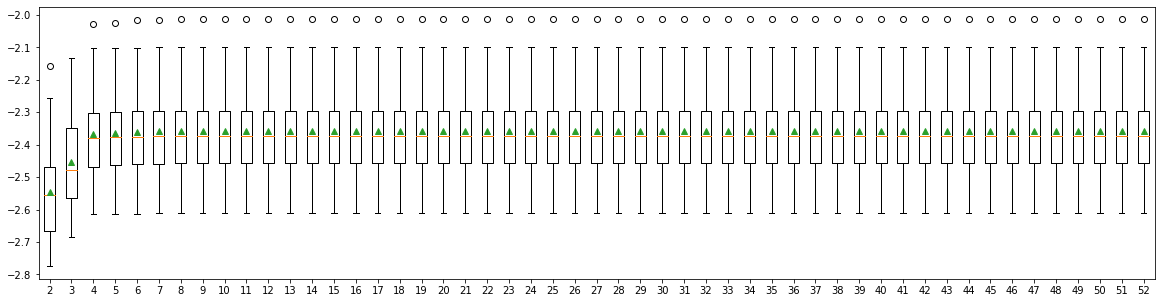

In [ ]:
# plot model performance:
plt.figure(figsize=(20,5))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
# Checking the selected features:
#----------------------------------
# define RFE
rfe_model = RFE(estimator=Lasso(), n_features_to_select=5)
# fit RFE
rfe_model.fit(X_train, y_train)
# checking the selected features:
#---------------------------------
#ranking_ndarray of shape (n_features,): The feature ranking, such that ranking_[i] corresponds to the ranking position
#                                        of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.
#--------
#support_ndarray of shape (n_features,): The mask of selected features.
#---------------------------------
for i in range(X_train.shape[1]):
  print('Column: %s, Selected?=%s, Rank: %d' % (X_train.columns[i], rfe_model.support_[i], rfe_model.ranking_[i]))

Column: type_of_ventilation(0:n-1:noninvasive-2:invasive), Selected?=True, Rank: 1
Column: renal_replacement(0:n-1:y), Selected?=True, Rank: 1
Column: Pneumo(0:n-1:y), Selected?=False, Rank: 12
Column: Trach_secration(0:little-1:abundant-2:ab_with_prulent), Selected?=False, Rank: 11
Column: Infiltrate(0:n-1:diffuse-2:localized), Selected?=False, Rank: 10
Column: ARDS(0:n-1:y), Selected?=False, Rank: 9
Column: eye_response(4:spontaneous-3:after_prompt-2:on_pain_sti-1:no), Selected?=False, Rank: 8
Column: Verbal(5:clear-4:confused-3:single_words-2:single_sounds-1:no), Selected?=False, Rank: 2
Column: Motor(6=>1_getting_worse), Selected?=False, Rank: 4
Column: GCS(1:raised-2:estimated), Selected?=False, Rank: 16
Column: degree(1:clinical-2:lab), Selected?=False, Rank: 18
Column: infection_origin(1:outpatient-2:nosocomial), Selected?=False, Rank: 20
Column: Localization(0:n-1:y), Selected?=False, Rank: 22
Column: Pneumonia(0:n-1:y), Selected?=False, Rank: 24
Column: other(0:n-1:y), Selecte

#### What if I do not have a feeling about which model to choose?

You may want to try a few alternative approaches to decide the feature sub-set, rather than relying on an assumption. to illustrate, we will use `LinearRegression, Lasso, ElasticNet `as alternatives.

In [ ]:
# Creating alternative model scenerios:
def get_models(n_features_to_select=16):
  models = dict()
  # Model 1: LinearRegression
  rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features_to_select)
  model = LinearRegression()
  models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
  # Model 2: Lasso
  rfe = RFE(estimator=Lasso(), n_features_to_select=n_features_to_select)
  model = Lasso()
  models['lasso'] = Pipeline(steps=[('s',rfe),('m',model)])
  # Model 3: ElasticNet
  rfe = RFE(estimator=ElasticNet(), n_features_to_select=n_features_to_select)
  model = ElasticNet()
  models['elastic'] = Pipeline(steps=[('s',rfe),('m',model)])
  return models

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=12)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  return scores

In [ ]:
# Evaluation
n_features_to_select = 16
models = get_models(n_features_to_select)
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X_train, y_train)
  results.append(scores)
  names.append(name)
  print('%s => %.3f (%.3f)' % (name, mean(scores), std(scores)))

lr => -1.704 (0.093)
lasso => -2.359 (0.111)
elastic => -2.090 (0.101)


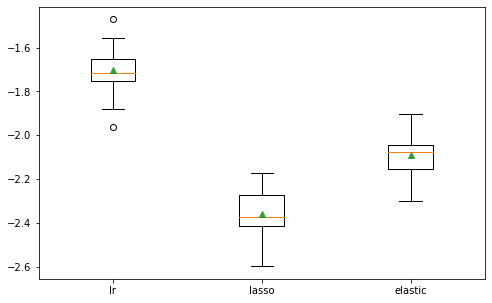

In [ ]:
# Visualization of the results
plt.figure(figsize=(8,5))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
# Alternative option: FRECV
# Recursive feature elimination with cross-validation to select features based on mean score. 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV 

# Reading material


https://towardsdatascience.com/benchmarking-categorical-encoders-9c322bd77ee8 